In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random
from array import array

Welcome to JupyROOT 6.21/01


In [2]:
from ROOT import TCanvas, gStyle, TFile, TProfile, TNtuple, TH1D, TH2D, TH3D, TGraph, TMultiGraph, TPad, THStack, TH1F 

In [25]:
DataFileLocation = "/home/fardousr/Project/Proton_Beam/Data"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)
# print(File)
# DataFile10mm = ['Data_Size_10mm_Alpha_0.root', 'Data_Size_10mm_Alpha_3.root', 'Data_Size_10mm_Alpha_4.root',\
#                 'Data_Size_10mm_Alpha_5.root', 'Data_Size_10mm_Alpha_6.root', 'Data_Size_10mm_Alpha_7.root',\
#                  'Data_Size_10mm_Alpha_5(250MeV).root']

DataFile10mm = ['Data_Size_10mm_Alpha_0.root', 'Data_Size_10mm_Alpha_3.root', 'Data_Size_10mm_Alpha_4.root', 'Data_Size_10mm_Alpha_5.root', 'Data_Size_10mm_Alpha_6.root', 'Data_Size_10mm_Alpha_7.root']
DataFile07mm = ['Data_Size_7mm_Alpha_0.root', 'Data_Size_7mm_Alpha_4.root']
DataFile04mm = ['Data_Size_4mm_Alpha_0.root', 'Data_Size_4mm_Alpha_4.root'] 
DataFile02mm = ['Data_Size_2mm_Alpha_0.root', 'Data_Size_2mm_Alpha_4.root', 'Data_Size_2mm_Alpha_6.root']
DataFile01mm = ['Data_Size_1mm_Alpha_0.root', 'Data_Size_1mm_Alpha_4.root', 'Data_Size_1mm_Alpha_6.root']
print(DataFile10mm)

['Data_Size_10mm_Alpha_0.root', 'Data_Size_10mm_Alpha_3.root', 'Data_Size_10mm_Alpha_4.root', 'Data_Size_10mm_Alpha_5.root', 'Data_Size_10mm_Alpha_6.root', 'Data_Size_10mm_Alpha_7.root']


In [4]:
DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[1])

In [27]:
Energy_Distribution    =  []

for i in range(len(DataFile10mm)):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile10mm[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    
print(Energy_Distribution)

[<cppyy.gbl.TH2D object at 0x55f11a363300>, <cppyy.gbl.TH2D object at 0x55f11a3394b0>, <cppyy.gbl.TH2D object at 0x55f118e3e5f0>, <cppyy.gbl.TH2D object at 0x55f118e3f5e0>, <cppyy.gbl.TH2D object at 0x55f11a187c80>, <cppyy.gbl.TH2D object at 0x55f11a1372c0>]


[<cppyy.gbl.TH2D object at 0x55f118e42cb0>, <cppyy.gbl.TH2D object at 0x55f118e4e9a0>, <cppyy.gbl.TH2D object at 0x55f118e3e5f0>, <cppyy.gbl.TH2D object at 0x55f118e3f5e0>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs


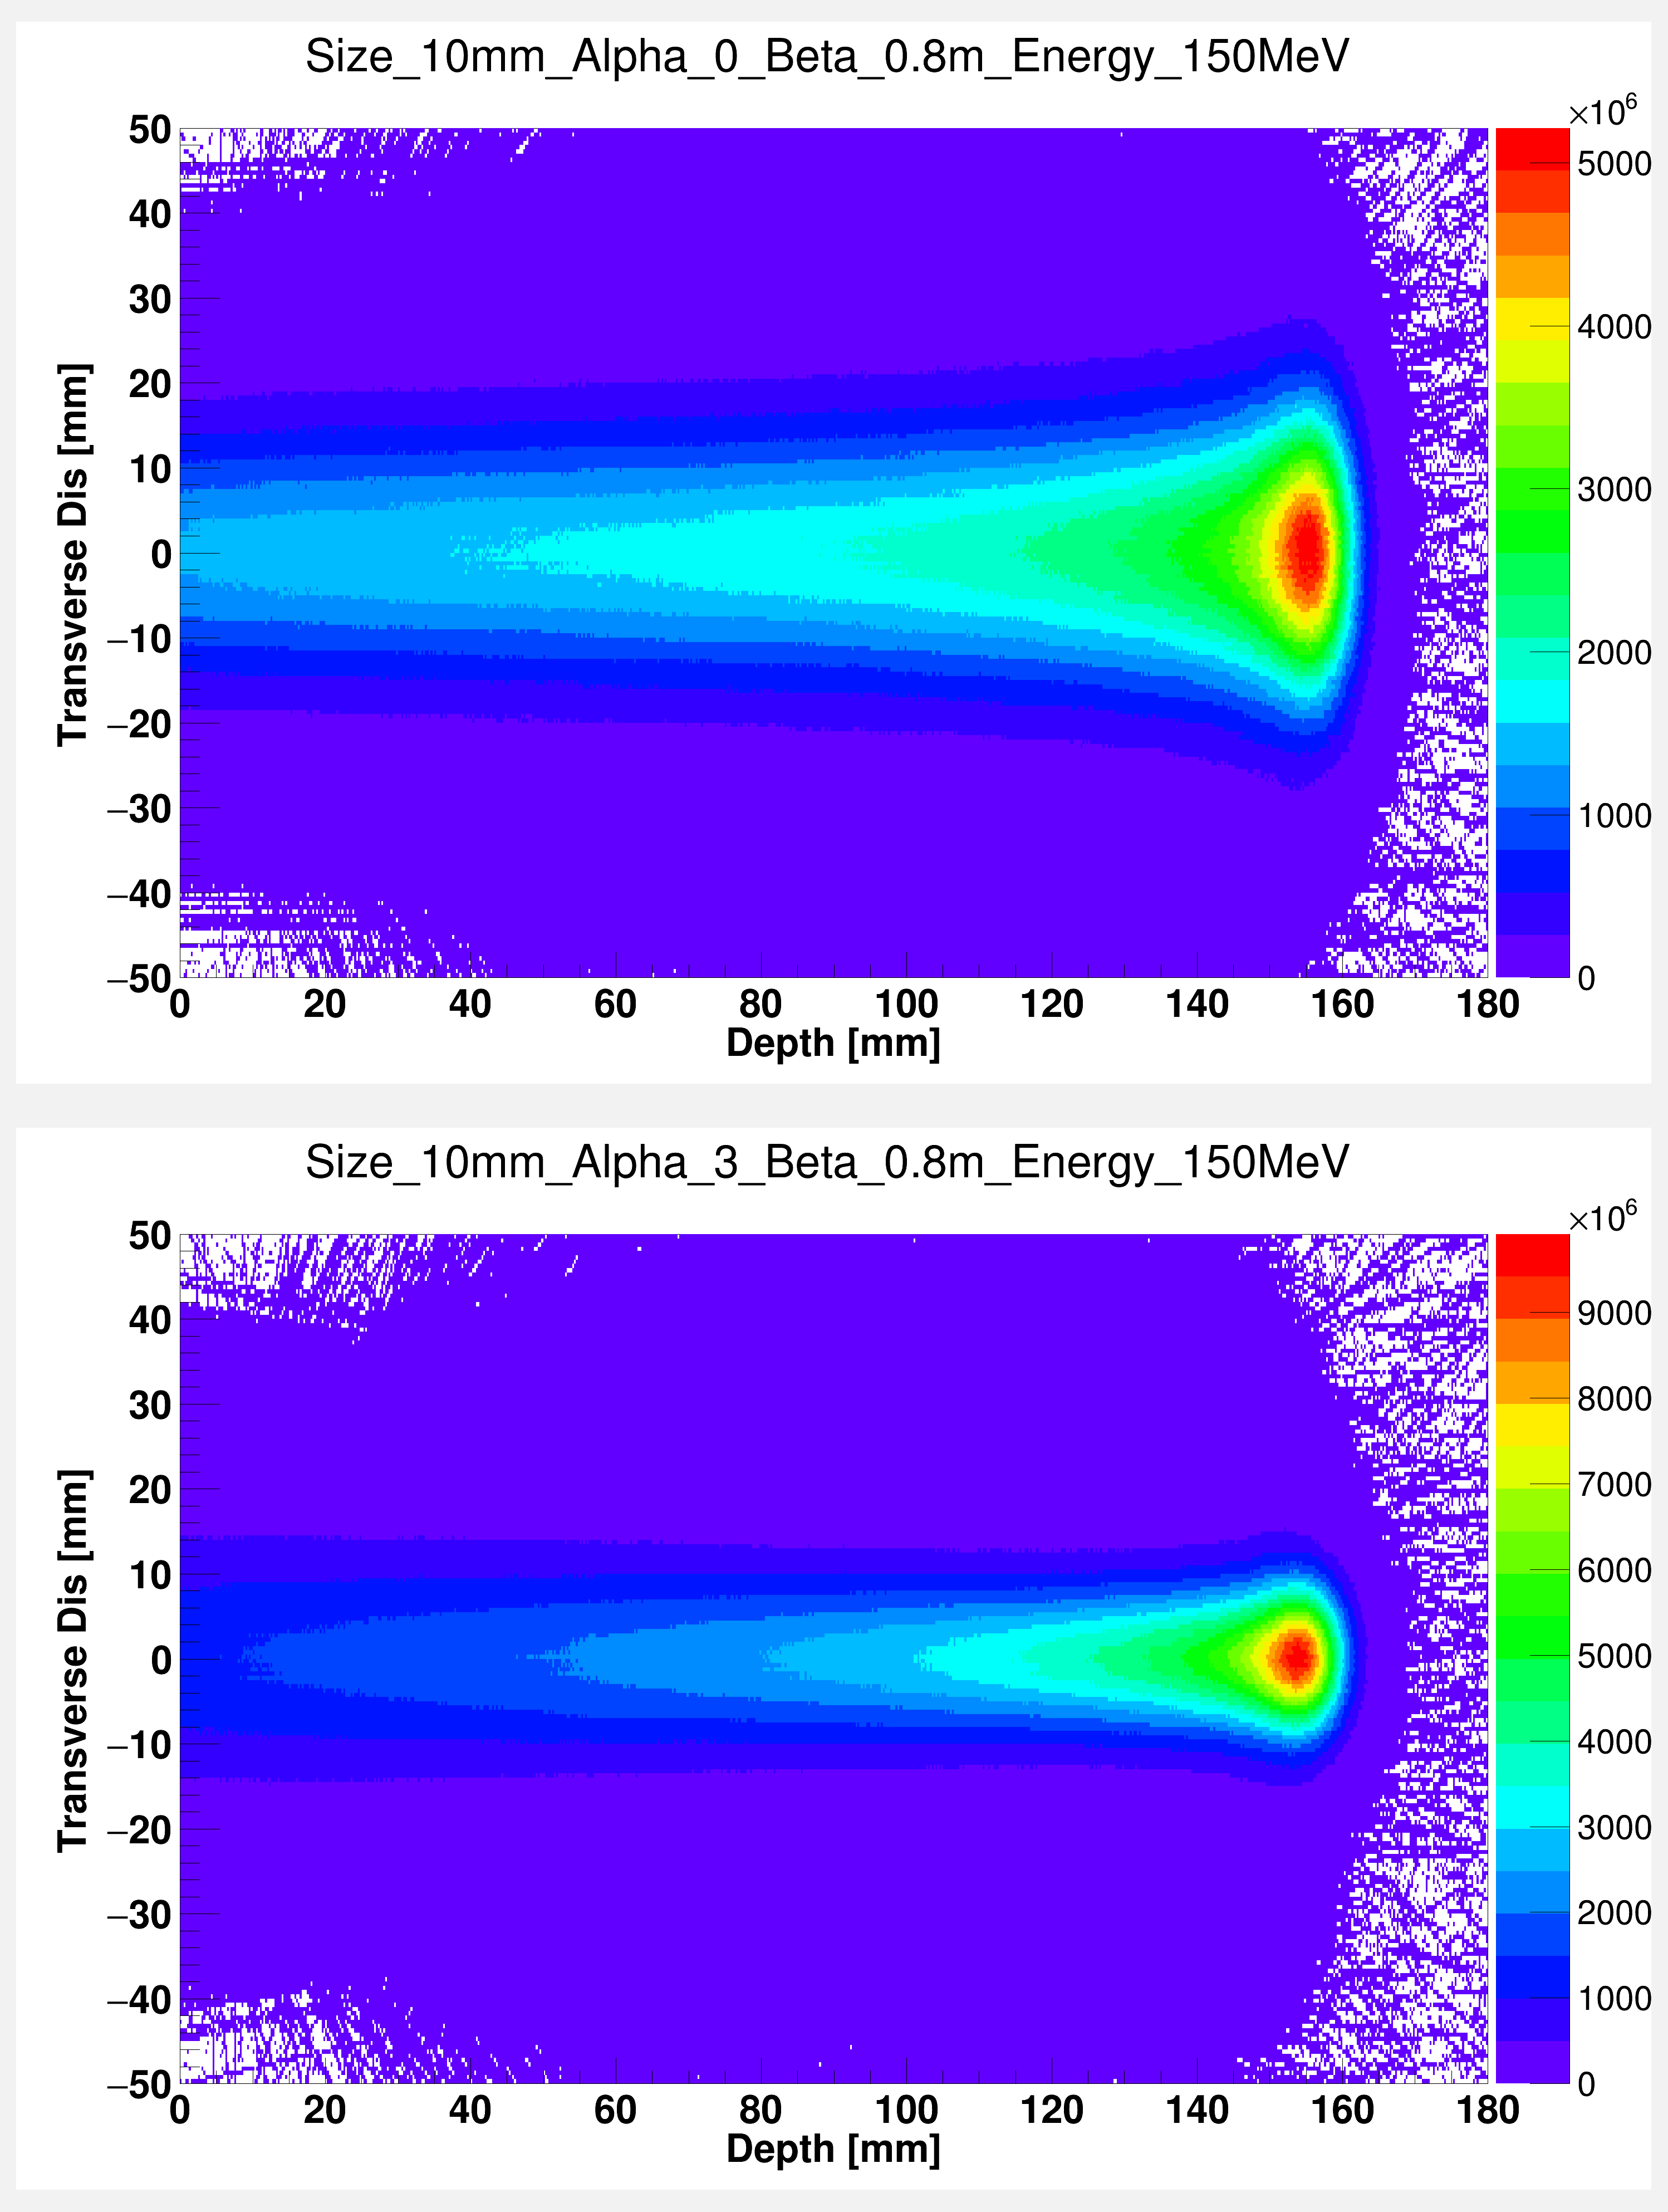

In [7]:
Energy_X_pro = []

for i in range(len(Energy_Distribution)):
    Energy = Energy_Distribution[i].Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile10mm[i]+"_x"
    name1 = DataFile10mm[i]+"_x1"
    Distribution_X = Energy.ProjectionY(name, 145, 155).Clone(name1)
    Distribution_X.SetDirectory(0)
    Energy_X_pro.append(Distribution_X)
    
print(Energy_Distribution)
cs = TCanvas("cs","cs",3000,4000)
cs.Divide(1,2)

for i in range(0,2):
    cs.cd(i+1);
    cs.SetFillColor( 19 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    Energy_Distribution[i].GetXaxis().SetTitle("Depth [mm]");
    Energy_Distribution[i].GetYaxis().SetTitle("Transverse Dis [mm]");
    Energy_Distribution[i].GetXaxis().CenterTitle();
    Energy_Distribution[i].GetYaxis().CenterTitle();
    Energy_Distribution[i].GetXaxis().SetRangeUser(0, 180);
    Energy_Distribution[i].GetYaxis().SetRangeUser(-50, 50);
    x = DataFile10mm[i]
    x = "Size_"+x[10:-5]+"_Beta_0.8m_Energy_150MeV"
    gStyle.SetPalette(1)
    Energy_Distribution[i].SetTitle(x)
    Energy_Distribution[i].SetStats(0)
    cs.Modified()
    cs.Update()
    Energy_Distribution[i].Draw("COLZ")
    
cs.Draw()
#cs.Print("m_Beta_0.8.png");

Data_Size_10mm_Alpha_0.root
Name: /home/fardousr/Project/Proton_Beam/Data/Data_Size_10mm_Alpha_0.root Title: 


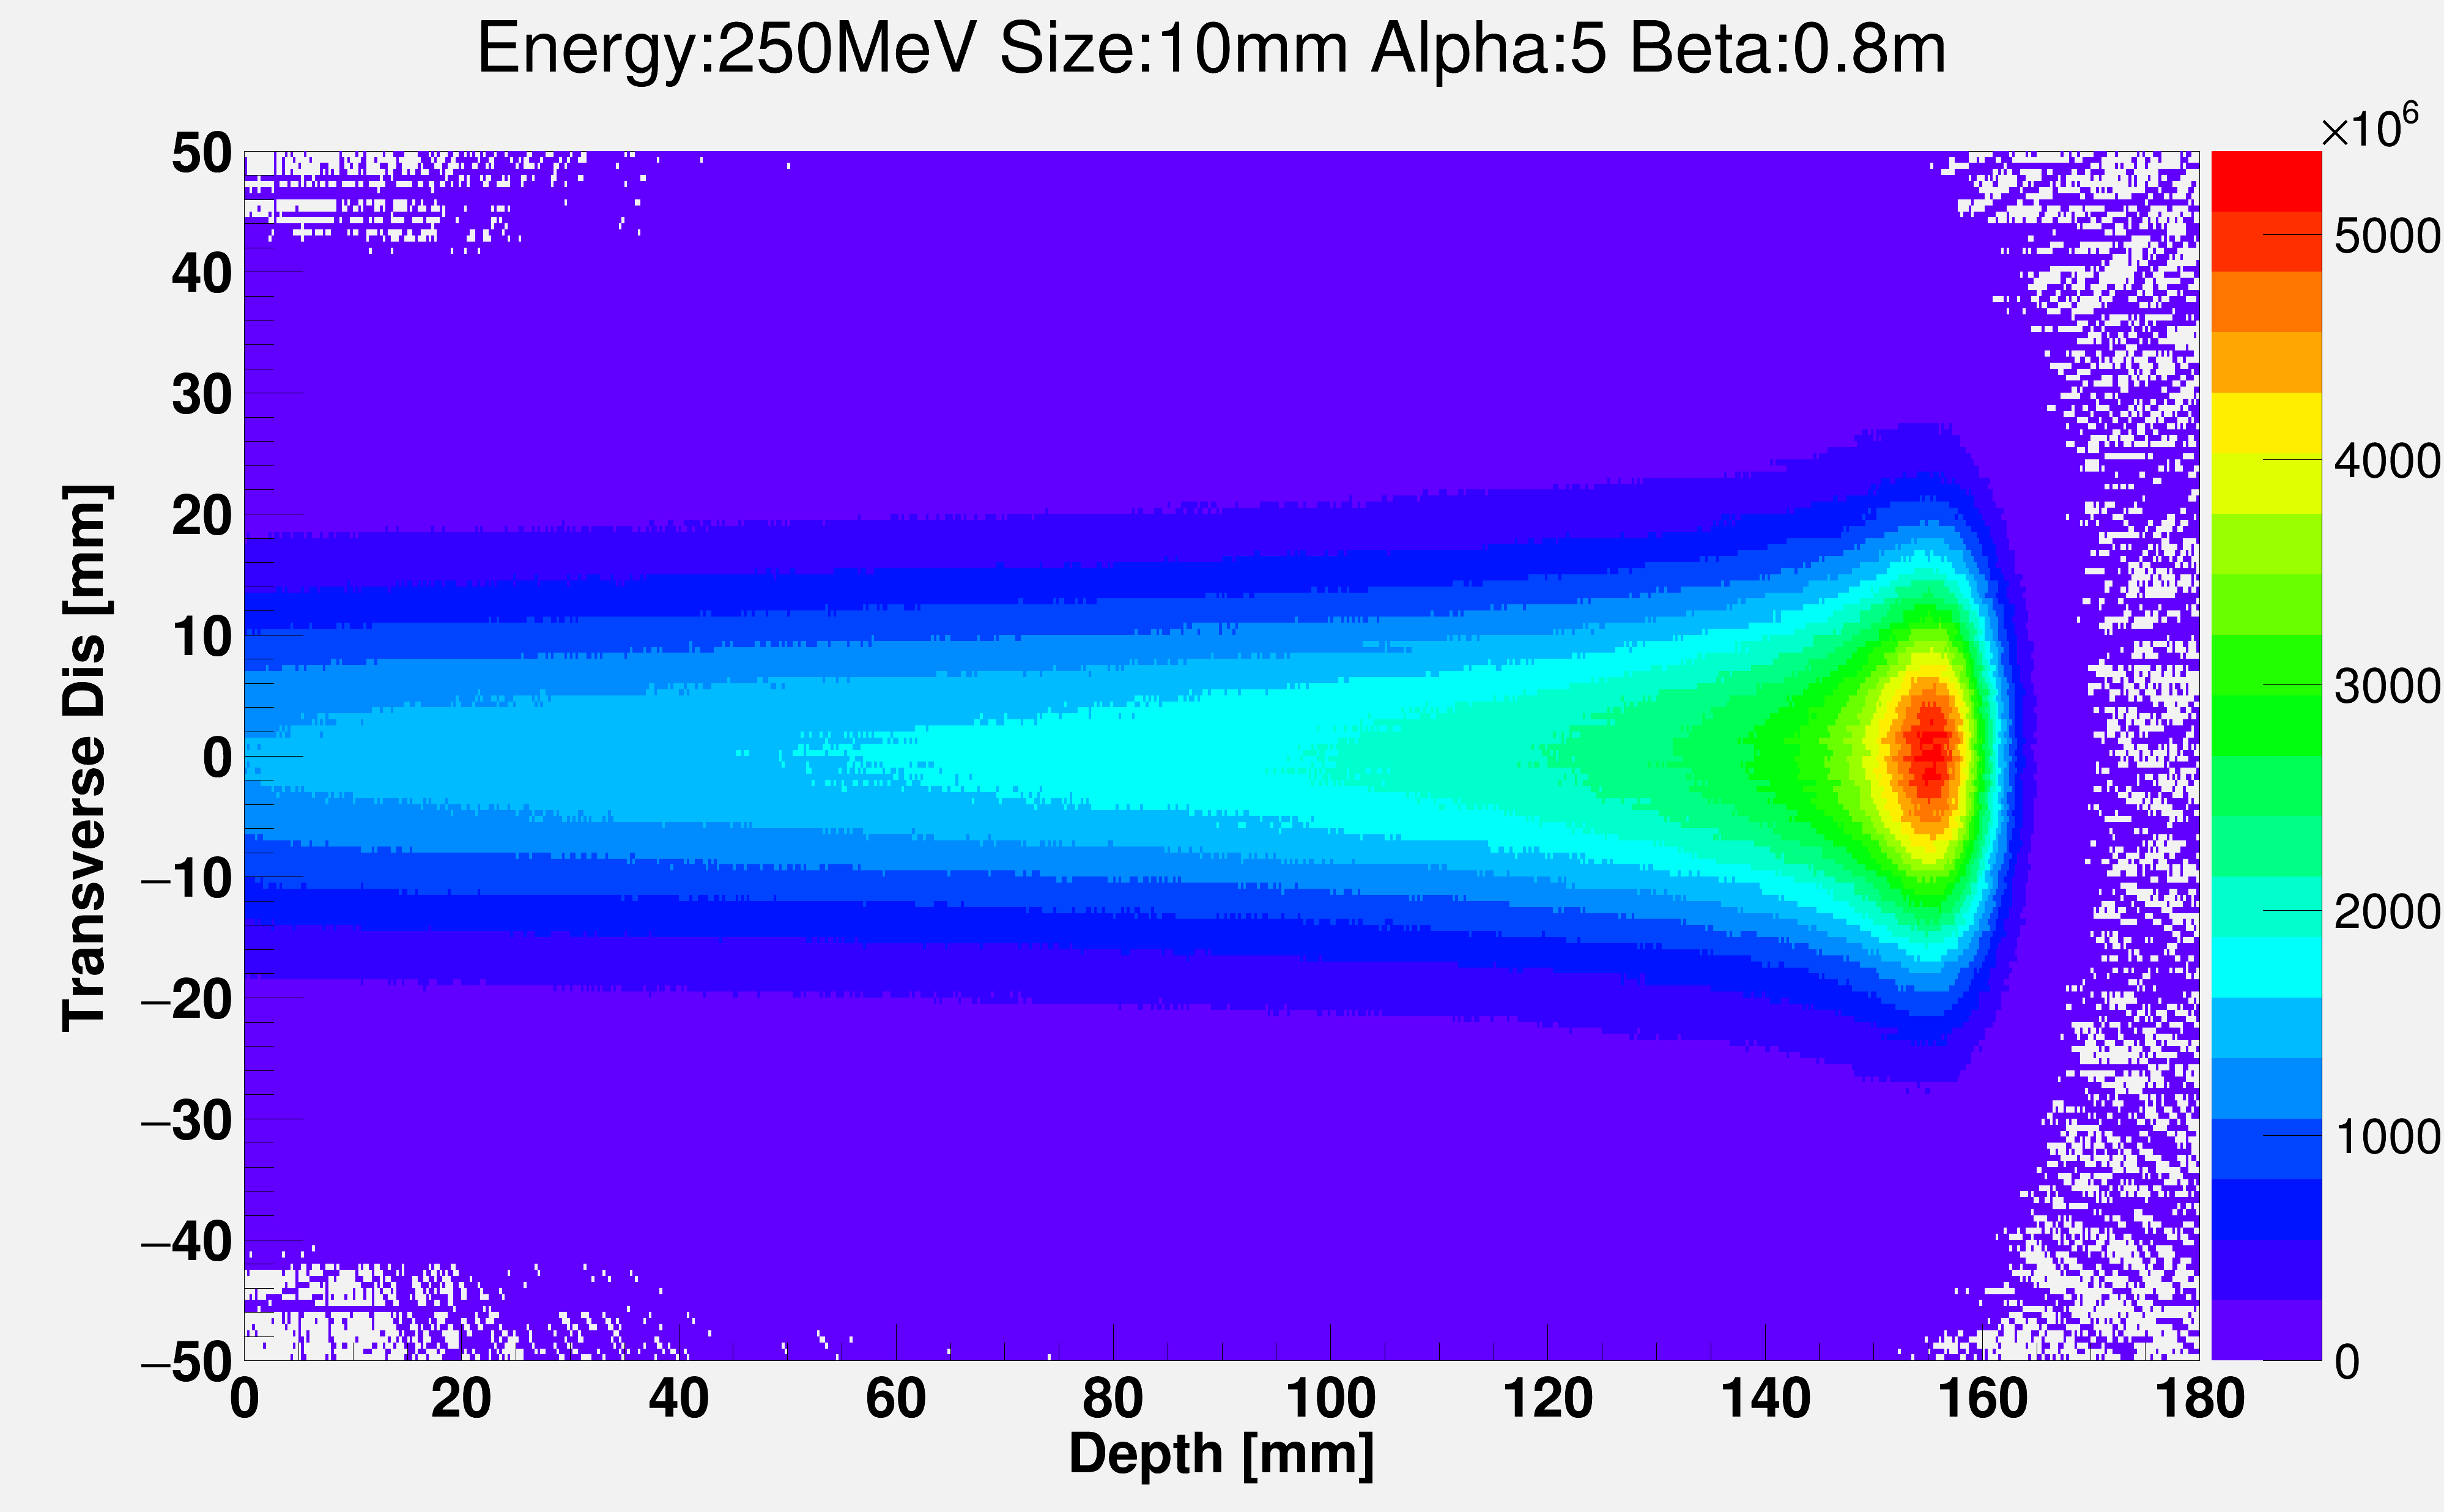

In [8]:
DataFile  = ROOT.TFile(DataFileLocation+"/"+DataFileList[20])
print(DataFileList[20])
#DataFile  = ROOT.TFile(DataFileLocation+'Data_Size_10mm_Alpha_5_Beta02(150MeV).root')
Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("yz")
print(DataFile)


hist = Energy_XZ
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 4000, 2500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse Dis [mm]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.SetTitle("Energy:250MeV Size:10mm Alpha:5 Beta:0.8m")
hist.Draw("COLZ")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()
# can1.Print("Energy_250MeV_Alpha_5.png");

In [28]:
Energy_Z    =  []
LET_Data_Z  =  []
NumProton   =  []
Energy_XZ   =  []
LET_Spect   =  []
KE_Spect    =  []


for i in range(len(DataFile10mm)):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[i])
    Energy_Z.append(DataFile.Get('ProtonEnergyHisto').ProjectionZ())
    LET_Data_Z.append(DataFile.Get('ProtonLETdataHisto').ProjectionZ())
    NumProton.append(DataFile.Get('ParticelCounter').GetBinContent(1))
    Energy_XZ.append(DataFile.Get('ProtonEnergyHisto').Project3D("xz"))
    LET_Spect.append(DataFile.Get('LETHisto'))
    KE_Spect.append(DataFile.Get('ProtonKEHisto'))


In [29]:
Energy_Distribution    =  []

for i in range(len(DataFile10mm)):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile10mm[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    
print(Energy_Distribution)

[<cppyy.gbl.TH2D object at 0x55f11a19fd10>, <cppyy.gbl.TH2D object at 0x55f11a1372c0>, <cppyy.gbl.TH2D object at 0x55f11a363300>, <cppyy.gbl.TH2D object at 0x55f11a3394b0>, <cppyy.gbl.TH2D object at 0x55f118e3e5f0>, <cppyy.gbl.TH2D object at 0x55f118e3f5e0>]


In [32]:
cs = TCanvas("cs","cs", 8100,7100)
cs.Divide(2,3)

for i in range(0,6):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    Energy_Distribution[i].GetXaxis().SetTitle("Depth [mm]");
    Energy_Distribution[i].GetYaxis().SetTitle("Transverse Dis [mm]");
    Energy_Distribution[i].GetXaxis().CenterTitle();
    Energy_Distribution[i].GetYaxis().CenterTitle();
    Energy_Distribution[i].GetXaxis().SetRangeUser(0, 180);
    Energy_Distribution[i].GetYaxis().SetRangeUser(-50, 50);
    x = DataFile10mm[i]
    x = "Size_"+x[10:-5]+"_Beta_0.8m_Energy_150MeV"
    gStyle.SetPalette(1)
    Energy_Distribution[i].SetTitle(x)
    Energy_Distribution[i].SetStats(0)
    cs.Modified()
    cs.Update()
    
    Energy_Distribution[i].Draw("COLZ")
    
cs.Draw()
cs.Print("10mm_Beta_0.8.png");

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file 10mm_Beta_0.8.png has been created


In [16]:
Energy_Distribution    =  []

for i in range(len(DataFile07mm)):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile07mm[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile07mm[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    
print(Energy_Distribution)

[<cppyy.gbl.TH2D object at 0x55f11a13d980>, <cppyy.gbl.TH2D object at 0x55f11a363300>]


[<cppyy.gbl.TH2D object at 0x55f118e42cb0>, <cppyy.gbl.TH2D object at 0x55f11a363300>]
[<cppyy.gbl.TH2D object at 0x55f118e42cb0>, <cppyy.gbl.TH2D object at 0x55f11a363300>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file 7mm_Beta_0.8.png has been created


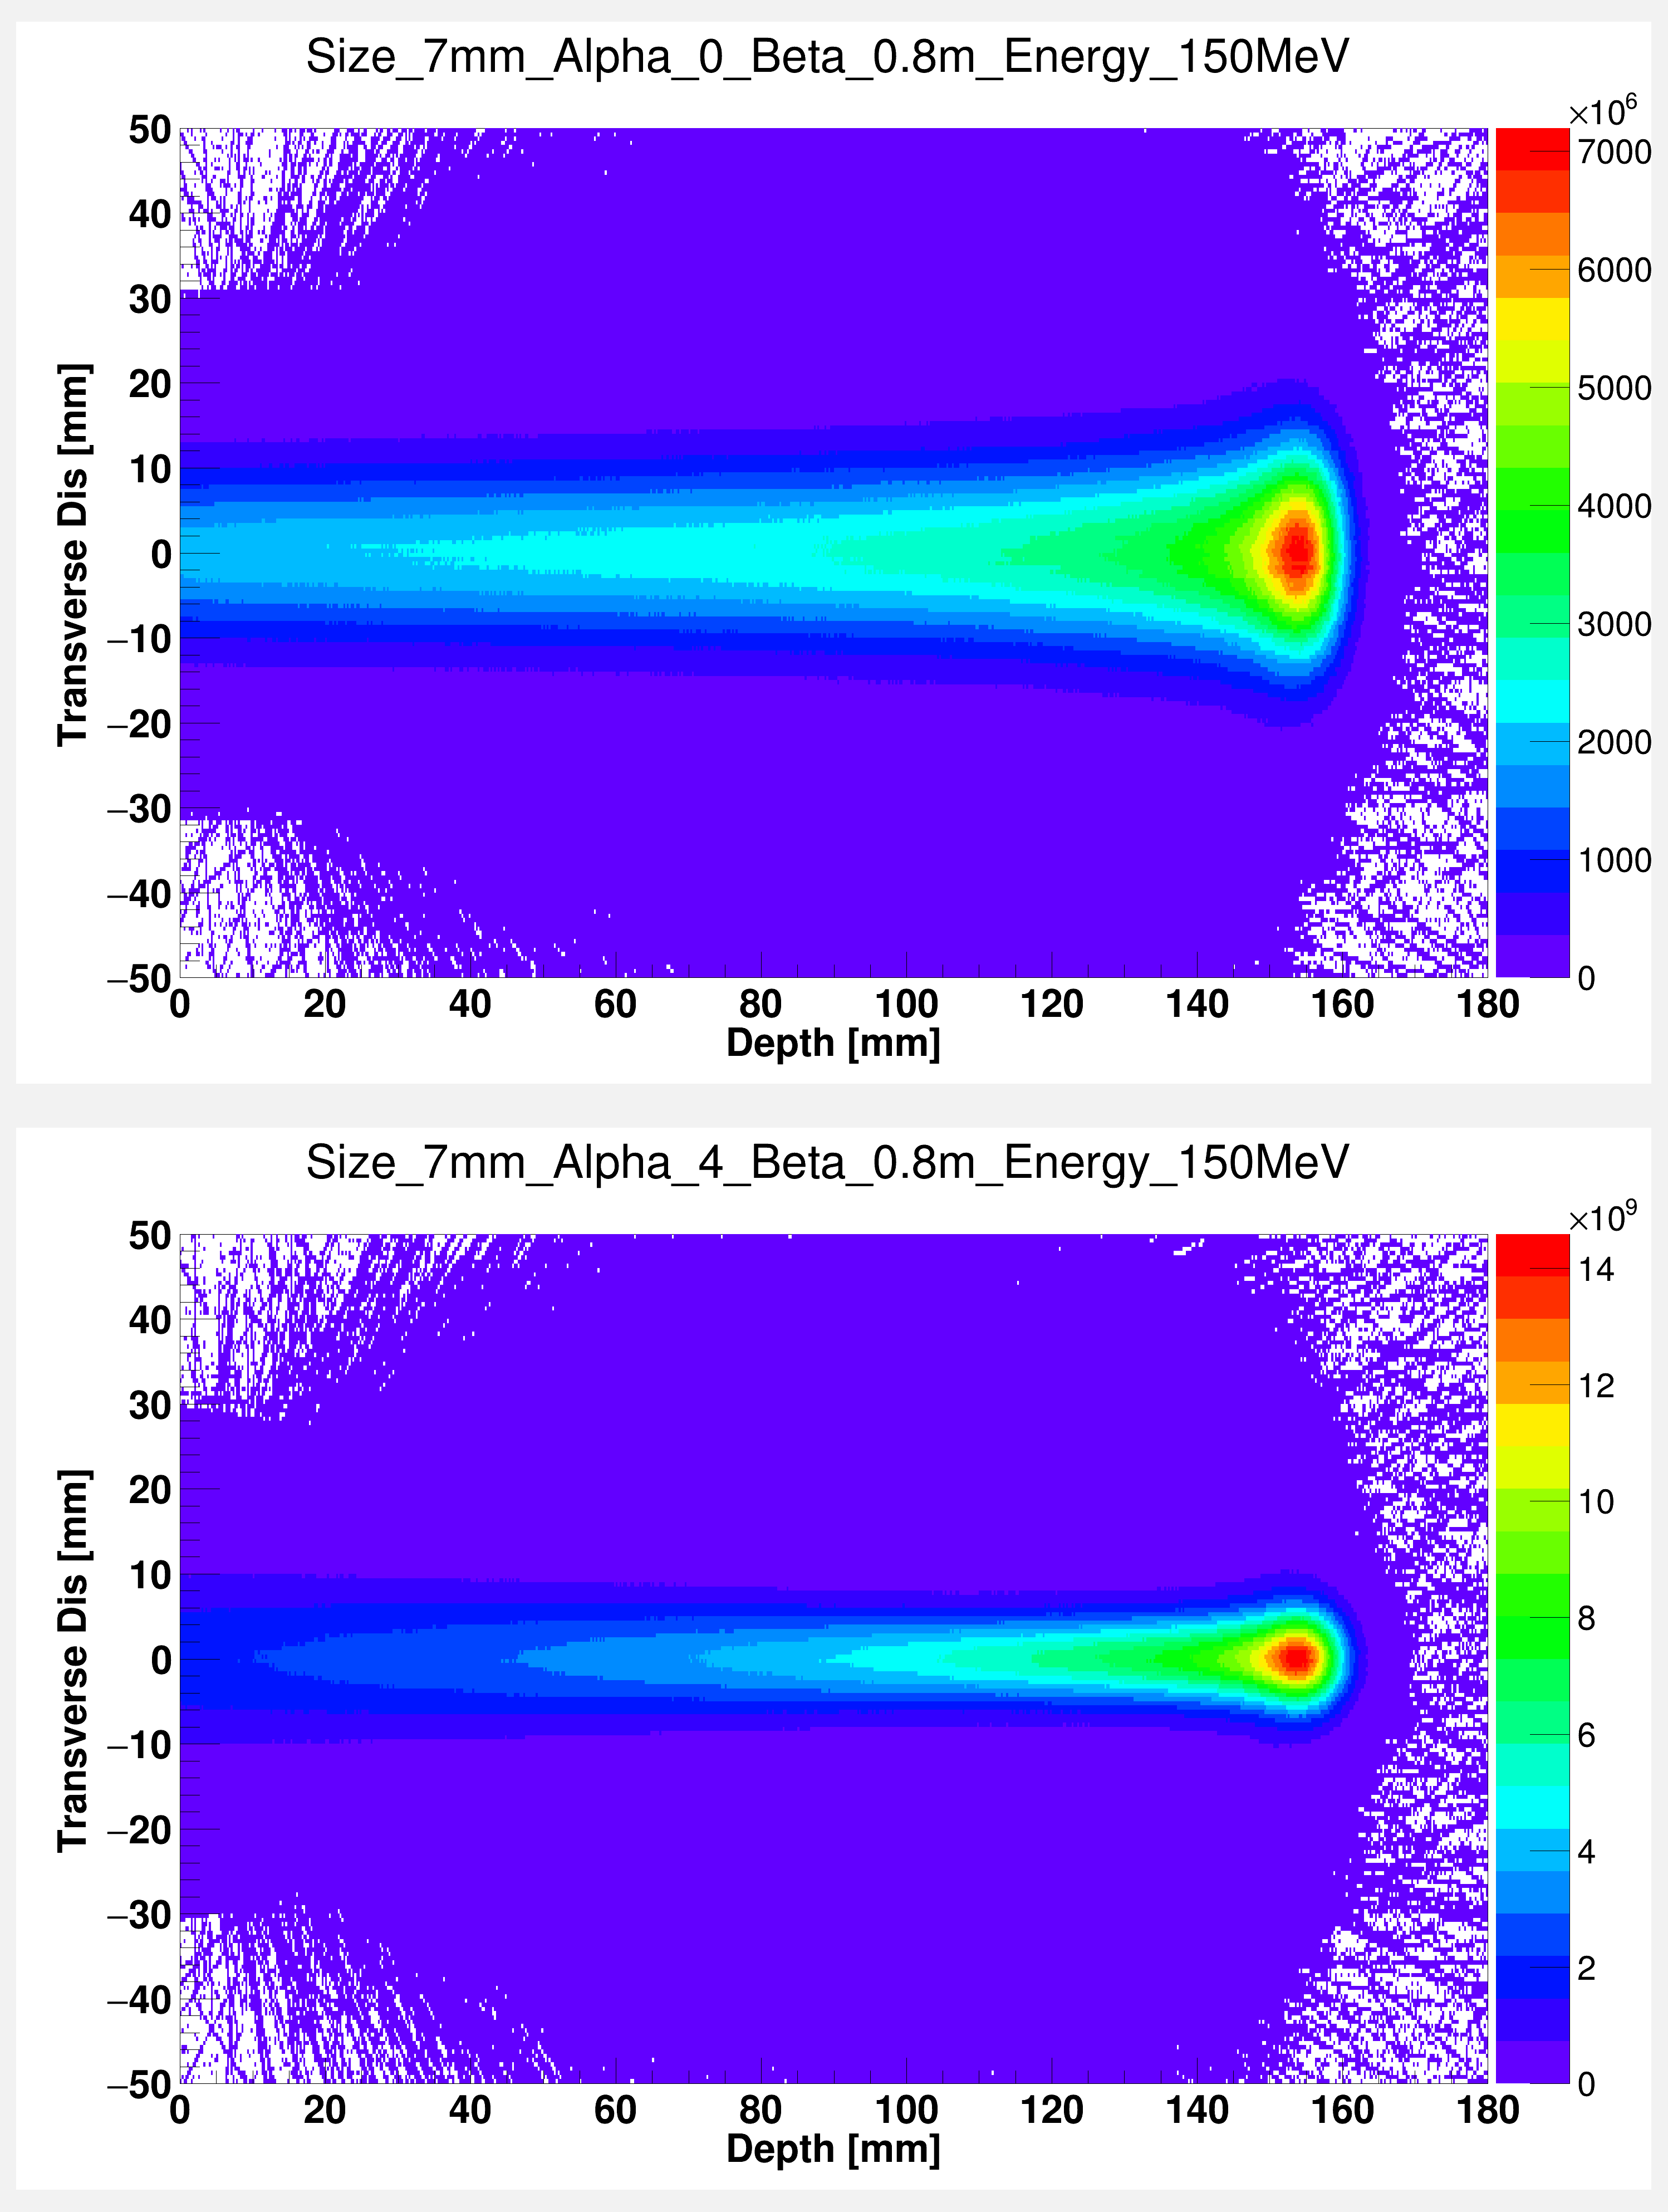

In [17]:
Energy_Distribution    =  []

for i in range(len(DataFile07mm)):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile07mm[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile07mm[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    
print(Energy_Distribution)

Energy_X_pro = []

for i in range(len(Energy_Distribution)):
    Energy = Energy_Distribution[i].Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile07mm[i]+"_x"
    name1 = DataFile07mm[i]+"_x1"
    Distribution_X = Energy.ProjectionY(name, 145, 155).Clone(name1)
    Distribution_X.SetDirectory(0)
    Energy_X_pro.append(Distribution_X)
    
print(Energy_Distribution)
cs = TCanvas("cs","cs",3000,4000)
cs.Divide(1,2)

for i in range(0,2):
    cs.cd(i+1);
    cs.SetFillColor( 19 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    Energy_Distribution[i].GetXaxis().SetTitle("Depth [mm]");
    Energy_Distribution[i].GetYaxis().SetTitle("Transverse Dis [mm]");
    Energy_Distribution[i].GetXaxis().CenterTitle();
    Energy_Distribution[i].GetYaxis().CenterTitle();
    Energy_Distribution[i].GetXaxis().SetRangeUser(0, 180);
    Energy_Distribution[i].GetYaxis().SetRangeUser(-50, 50);
    x = DataFile07mm[i]
    x = "Size_"+x[10:-5]+"_Beta_0.8m_Energy_150MeV"
    Energy_Distribution[i].SetTitle(x)
    Energy_Distribution[i].SetStats(0)
    cs.Modified()
    cs.Update()
    Energy_Distribution[i].Draw("COLZ")
    
cs.Draw()
cs.Print("7mm_Beta_0.8.png");

[<cppyy.gbl.TH2D object at 0x5618b98ea2b0>, <cppyy.gbl.TH2D object at 0x5618b9909430>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file 4mm_Beta_0.8.png has been created


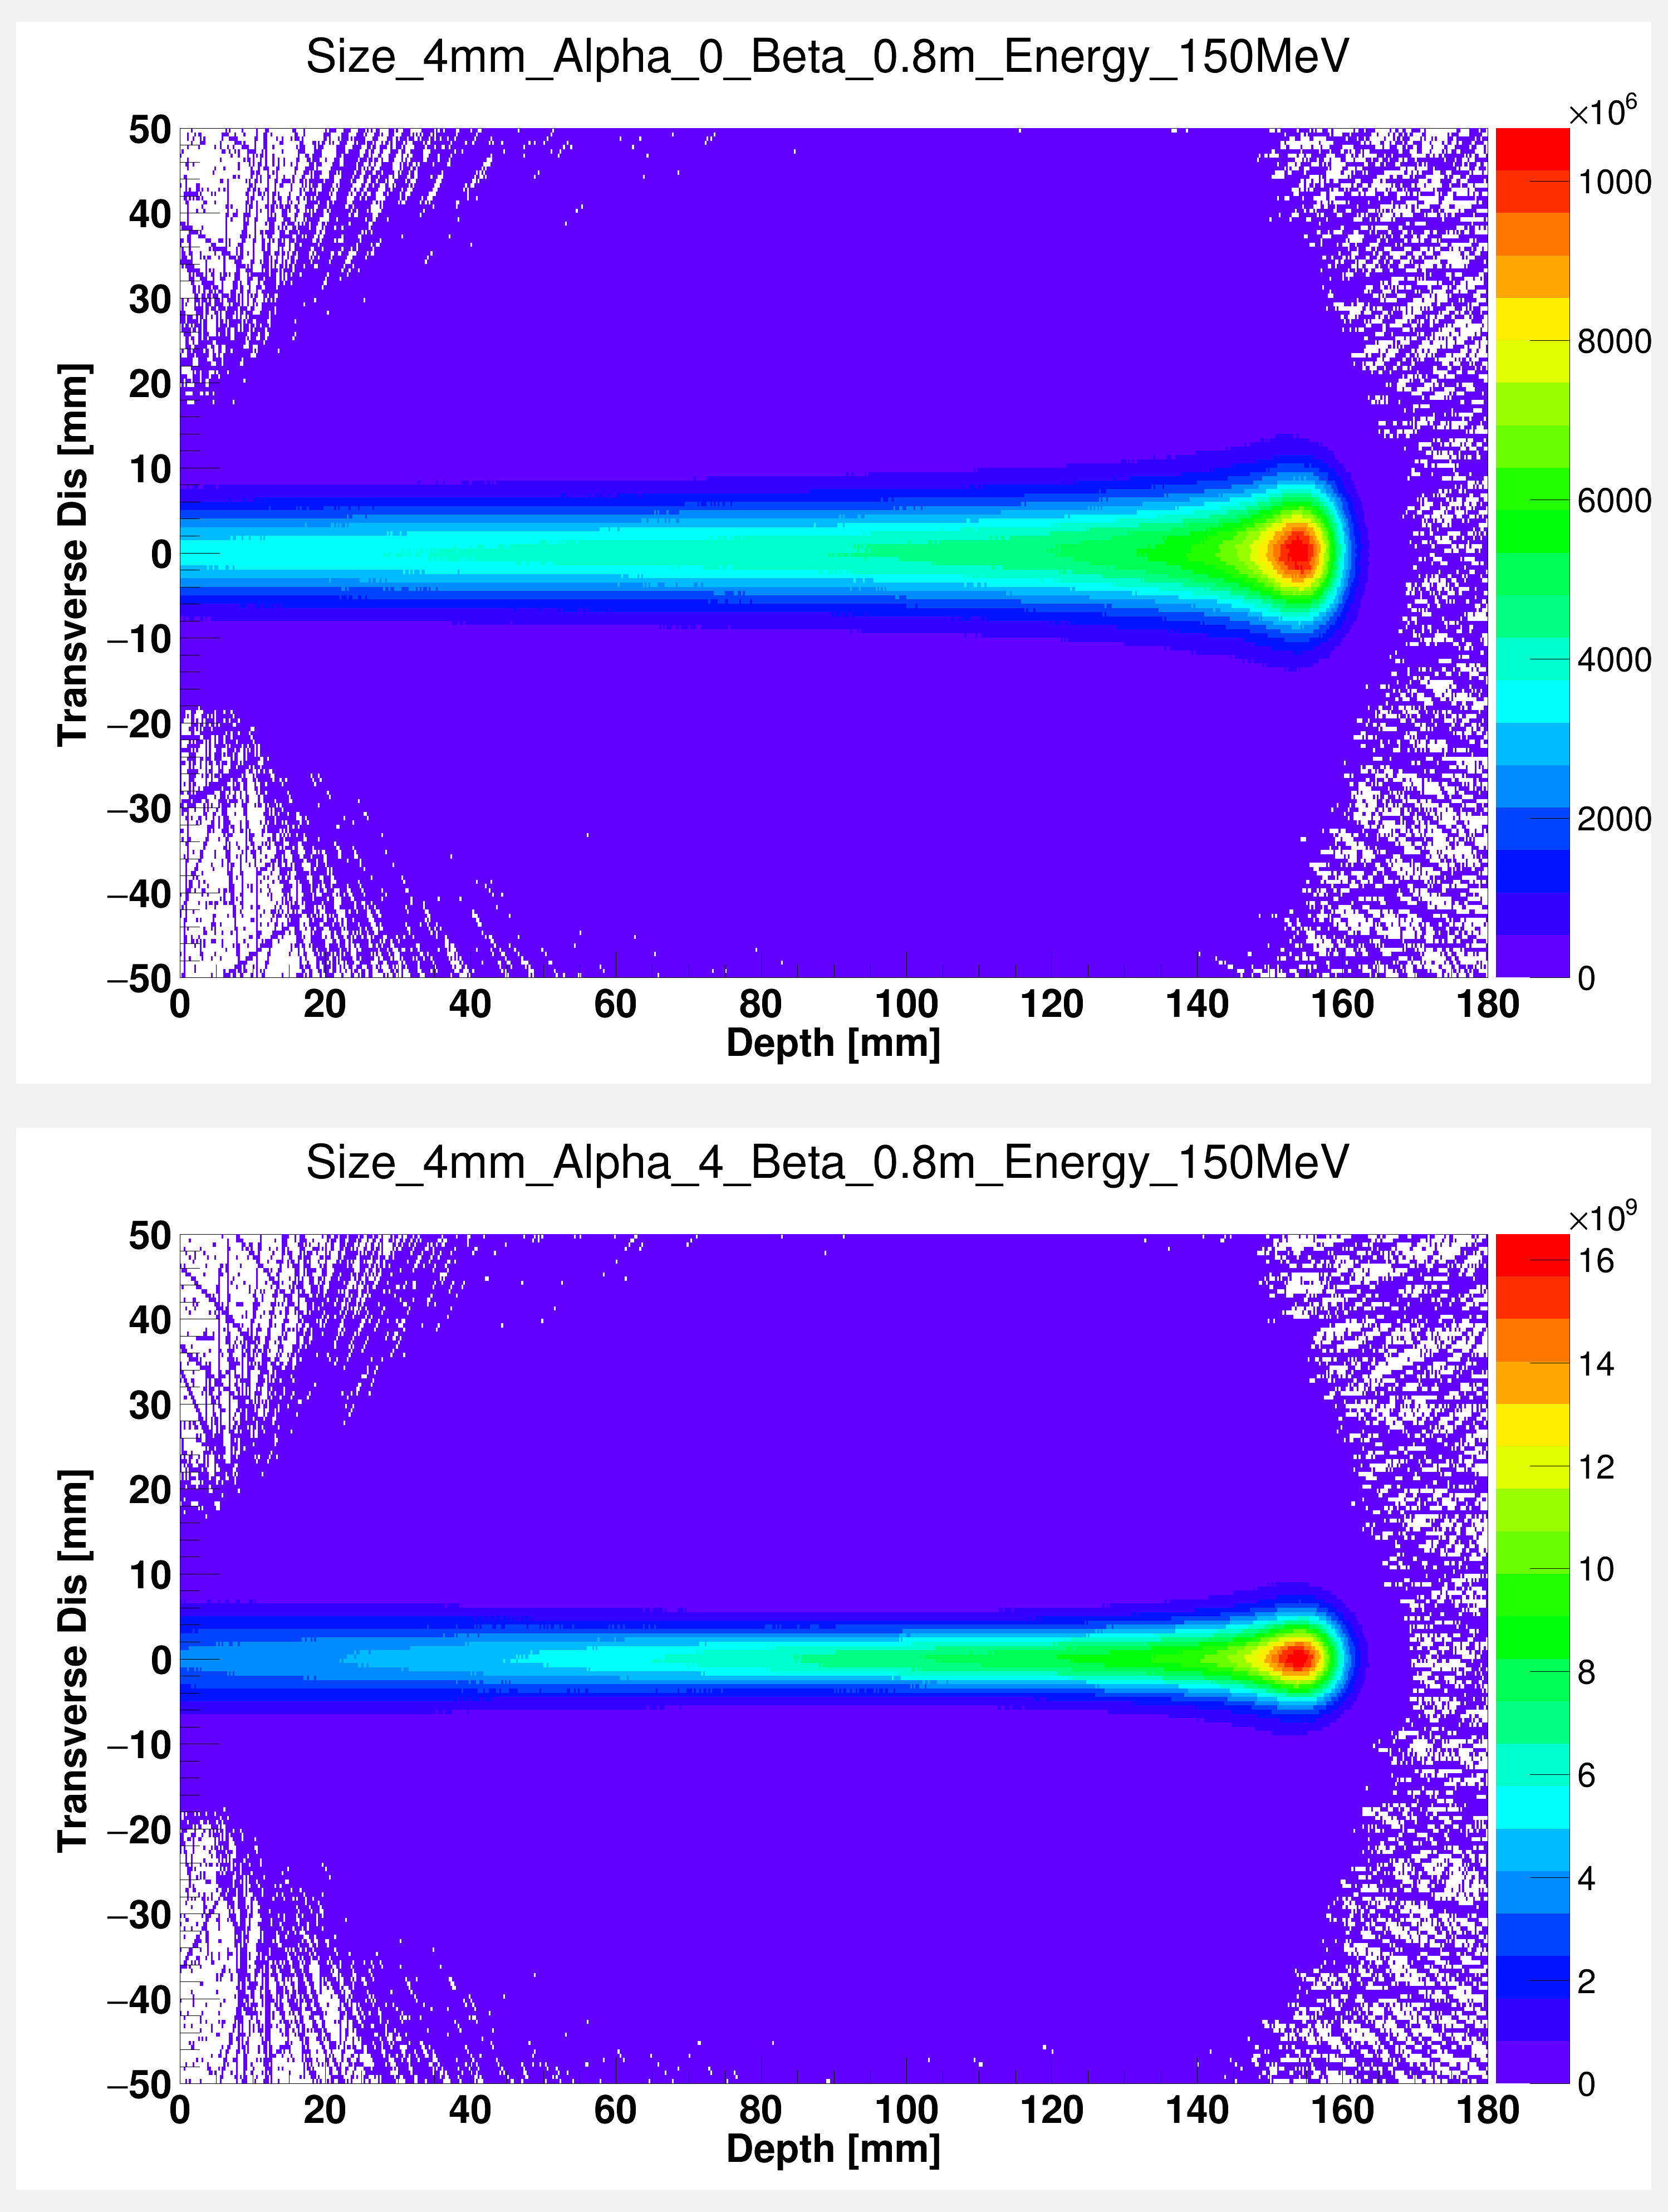

In [17]:
Energy_Distribution    =  []

for i in range(len(DataFile04mm)):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile04mm[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile04mm[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    
print(Energy_Distribution)

cs = TCanvas("cs","cs",3000,4000)
cs.Divide(1,2)

for i in range(0,2):
    cs.cd(i+1);
    cs.SetFillColor( 19 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    Energy_Distribution[i].GetXaxis().SetTitle("Depth [mm]");
    Energy_Distribution[i].GetYaxis().SetTitle("Transverse Dis [mm]");
    Energy_Distribution[i].GetXaxis().CenterTitle();
    Energy_Distribution[i].GetYaxis().CenterTitle();
    Energy_Distribution[i].GetXaxis().SetRangeUser(0, 180);
    Energy_Distribution[i].GetYaxis().SetRangeUser(-50, 50);
    x = DataFile04mm[i]
    x = "Size_"+x[10:-5]+"_Beta_0.8m_Energy_150MeV"
    Energy_Distribution[i].SetTitle(x)
    Energy_Distribution[i].SetStats(0)
    cs.Modified()
    cs.Update()
    Energy_Distribution[i].Draw("COLZ")
    
cs.Draw()
cs.Print("4mm_Beta_0.8.png");

[<cppyy.gbl.TH2D object at 0x55f118e42cb0>, <cppyy.gbl.TH2D object at 0x55f11a363300>, <cppyy.gbl.TH2D object at 0x55f118e3e5f0>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file 2mm_Beta_0.8.png has been created


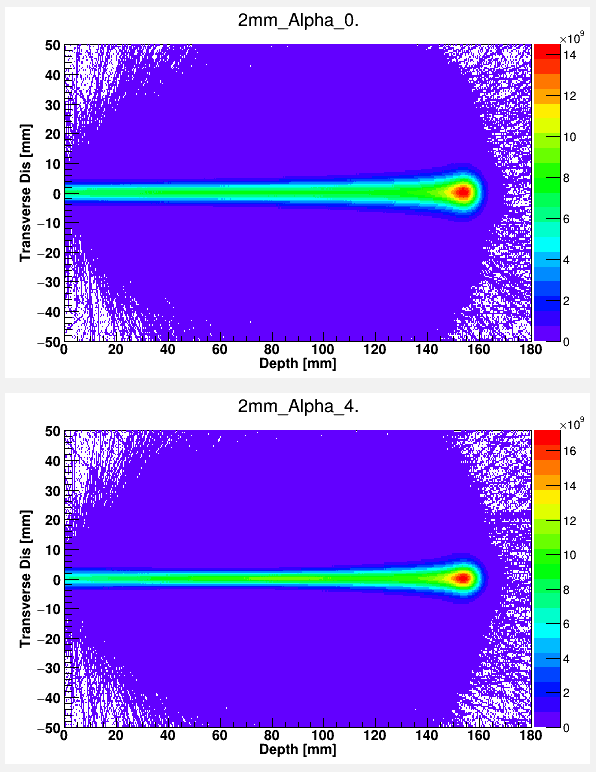

In [18]:
Energy_Distribution    =  []

for i in range(len(DataFile02mm)):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile02mm[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile02mm[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
    
print(Energy_Distribution)

cs = TCanvas("cs","cs",600,800)
cs.Divide(1,2)

for i in range(0,2):
    cs.cd(i+1);
    cs.SetFillColor( 19 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    Energy_Distribution[i].GetXaxis().SetTitle("Depth [mm]");
    Energy_Distribution[i].GetYaxis().SetTitle("Transverse Dis [mm]");
    Energy_Distribution[i].GetXaxis().CenterTitle();
    Energy_Distribution[i].GetYaxis().CenterTitle();
    Energy_Distribution[i].GetXaxis().SetRangeUser(0, 180);
    Energy_Distribution[i].GetYaxis().SetRangeUser(-50, 50);
    x = DataFile02mm[i]
    x = x[10:-4]
    Energy_Distribution[i].SetTitle(x)
    Energy_Distribution[i].SetStats(0)
    cs.Modified()
    cs.Update()
    Energy_Distribution[i].Draw("COLZ")
    
cs.Draw()
cs.Print("2mm_Beta_0.8.png");

In [19]:
EneDepList = []

for j in range(5):
    EneDep   = array( 'd' )
    depth     = array( 'd' )
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[j])
    ene_z = DataFile.Get('ProtonEnergyHisto').ProjectionZ()
    for i in range(0,801):
        ene = ene_z.GetBinContent(i+1)
        EneDep.append(ene)
        depth.append(i*.25)
    EneDepList.append(EneDep)



IndexError: list index out of range

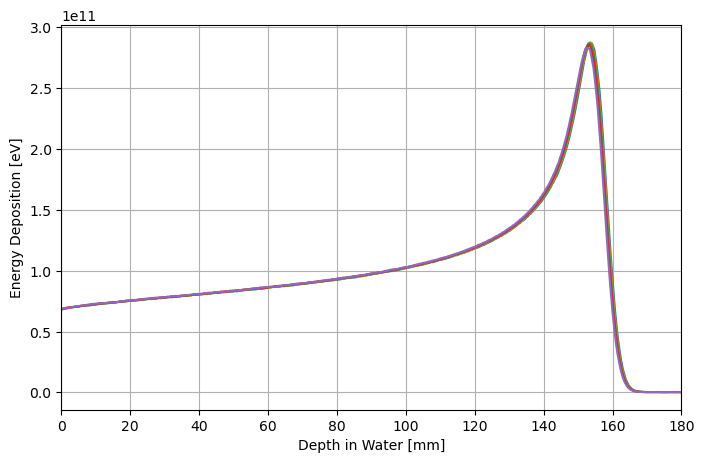

In [20]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

for j in range(5):
    
    plt.plot(depth, EneDepList[j])
    plt.xlim(0,180)
    plt.grid(True)
plt.xlabel("Depth in Water [mm]")
plt.ylabel("Energy Deposition [eV]")
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


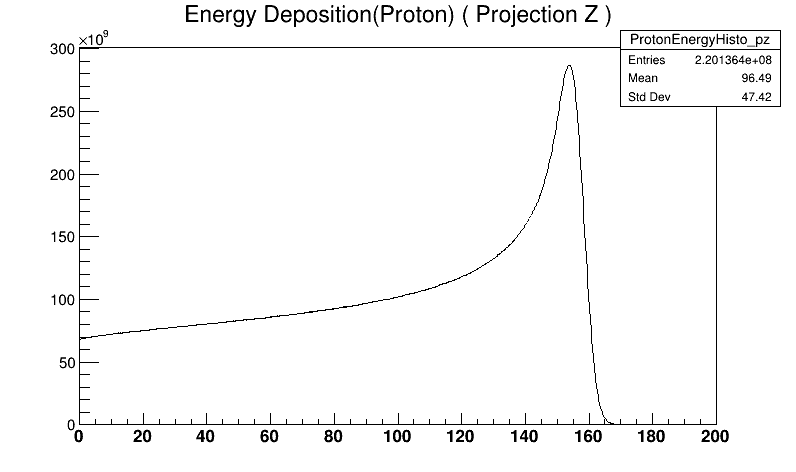

In [27]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
Energy_Z_Projection[0].Draw("HIST C")
c1.Modified()
c1.Update()
c1.Draw()


Name: /home/fardousr/Project/Proton_Beam/Data/Data_Size_10mm_Alpha_0.root Title: 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


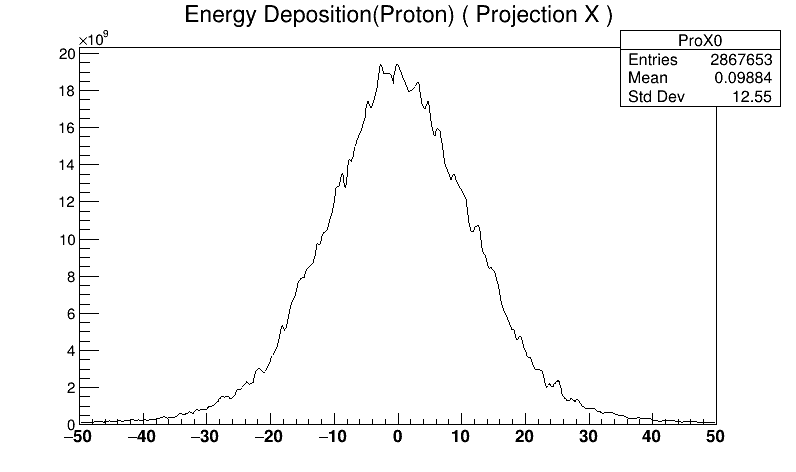

In [106]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[0])
print(DataFile)
Energy_X = DataFile.Get('ProtonEnergyHisto').ProjectionX('ProX0', 145, 155)
Energy_X.Draw("HIST C")

c1.Draw()

# for i in range(1,4): #len(DataFile10mm)):
#     DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[i])
#     print(DataFile)
#     s = "ProX" + str(i)
#     Energy_X = DataFile.Get('ProtonEnergyHisto').ProjectionX(s, 140, 160)
#     Energy_X.Draw("HIST C SAME")
#     c1.Update()
#     c1.Draw()
# bin1 = Energy_X1.FindFirstBinAbove(Energy_X1.GetMaximum()/2);
# bin2 = Energy_X1.FindLastBinAbove(Energy_X1.GetMaximum()/2);
# fwhm = Energy_X1.GetBinCenter(bin2) - Energy_X1.GetBinCenter(bin1);
# print(fwhm)

Name: /home/fardousr/Project/Proton_Beam/Data/Data_Size_10mm_Alpha_4.root Title: 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


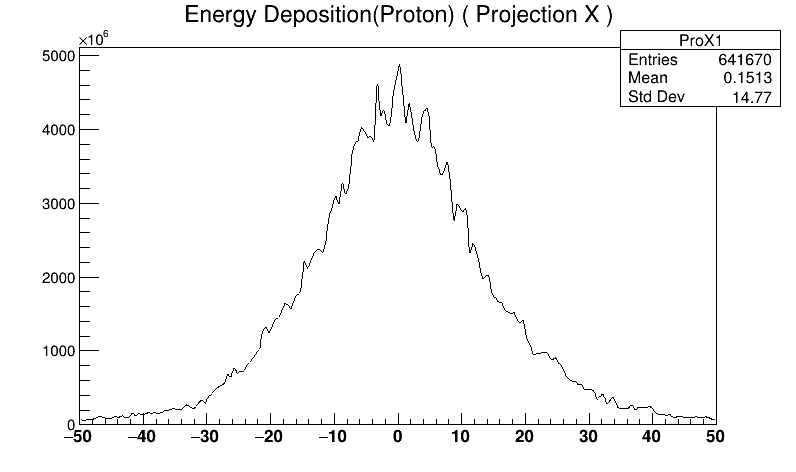

In [111]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[2])
Energy_X = DataFile.Get('ProtonEnergyHisto').ProjectionX('ProX1', 145, 155)
Energy_X.Draw("HIST C")
c1.Update()
c1.Draw()

In [135]:
Energy_Distribution    =  []

for i in range(2):
    DataFile = ROOT.TFile(DataFileLocation+"/"+DataFile07mm[i])
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFile10mm[i]
    Distribution = Energy.ProjectionX(name, 145, 155).Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)
print(Energy_Distribution) 

[<cppyy.gbl.TH1D object at 0x55ae8a2b0160>, <cppyy.gbl.TH1D object at 0x55ae8a2b0590>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


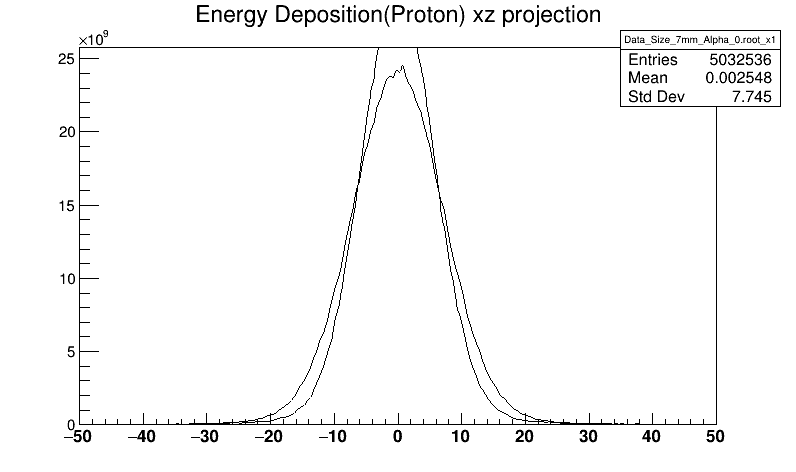

In [11]:
c1 = TCanvas( 'c1', 'c1', 800, 500 )
Energy_X_pro[0].Draw("Hist C")
Energy_X_pro[1].Draw("HIST C SAME")
c1.Update()
c1.Draw()
#c1.Print("Transverse145_155mm.png")

In [ ]:
NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.54401e+09   7.31648e+06   2.16675e+03   1.07204e-12
   2  Mean        -3.90798e-01   2.08268e-02   1.00420e-03   3.71945e-04
   3  Sigma        1.62166e+01   1.91035e-02   1.41909e-05  -4.63050e-02

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


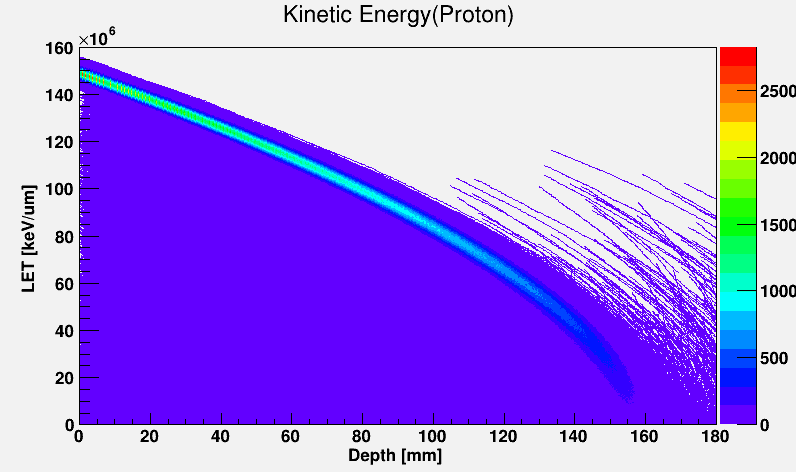

In [23]:
hist = KE_Spect
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by Protons', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("LET [keV/um]");
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(0, 160000000);
hist.Draw("COLZ1")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [23]:
LET = LET_Data_Z/(Energy_Z*10**6)
print(LET_Data_Z)
print(Energy_Z)
print(LET)
hist = LET
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by Protons', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("LET [keV/um]");
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 160);
hist.GetYaxis().SetRangeUser(0, 12);
hist.Draw("COLZ1")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [24]:
c1 = TCanvas('c1', 'c1', 800, 500)
LET = LET_Data_Z/(Energy_Z*10**6)
print(LET_Data_Z)
print(Energy_Z)
print(LET)
DoseLET   = array( 'd' )
depth     = array( 'd' )

for i in range(0,801):
    let = LET.GetBinContent(i+1)
    DoseLET.append(let)
    depth.append(i*.25)

c1 = TCanvas( 'c1', 'LET', 200, 10, 800, 500)

DetLETgraph = TGraph( 800, depth, DoseLET)
DetLETgraph.SetLineColor( 4 )
DetLETgraph.SetLineWidth( 2 )
DetLETgraph.SetMarkerColor( 5 )
DetLETgraph.GetXaxis().CenterTitle();
DetLETgraph.GetYaxis().CenterTitle();

DetLETgraph.SetMarkerStyle( 0 )
DetLETgraph.SetTitle( 'Linear Energy Transfer' )
DetLETgraph.GetXaxis().SetTitle( 'Depth [mm]' )
DetLETgraph.GetXaxis().SetLimits(0, 168)
DetLETgraph.GetYaxis().SetLimits(0, 17)
DetLETgraph.GetYaxis().SetTitle( 'LET [keV/um]' )
DetLETgraph.Draw( 'ACP' )

c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

TypeError: unsupported operand type(s) for /: 'list' and 'list'

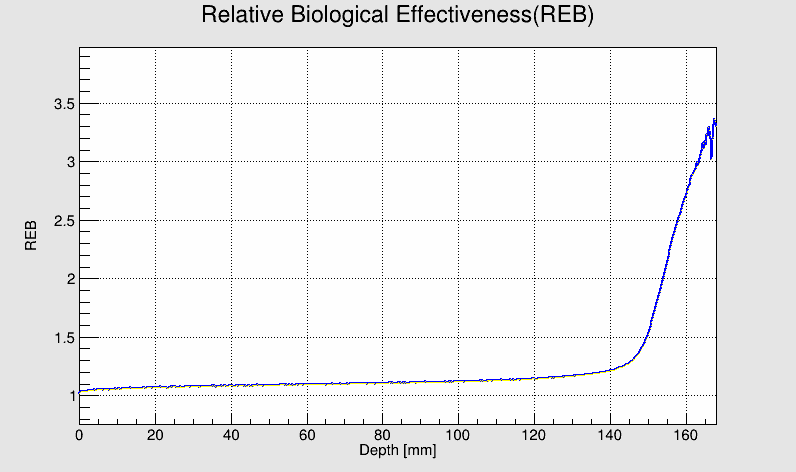

In [34]:
REB   = array( 'd' )
depth = array( 'd' )

for i in range(0,801):
    let = DoseLET[i]
    reb = 0.892 + (0.179*let)
    REB.append(reb)
    depth.append(i*.25)

gr = TGraph( 800, depth, REB)
gr.SetLineColor( 4 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 5 )
gr.GetXaxis().CenterTitle();
gr.GetYaxis().CenterTitle();

gr.SetMarkerStyle( 0 )
gr.SetTitle( 'Relative Biological Effectiveness(REB)' )
gr.GetXaxis().SetTitle( 'Depth [mm]' )
gr.GetXaxis().SetLimits(0, 168)
gr.GetYaxis().SetTitle( 'REB' )
gr.Draw( 'ACP' )

# TCanvas.Update() draws the frame, after which one can change it
c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )

c1.Modified()
c1.Update()
c1.Draw()

In [21]:
DataFile  = ROOT.TFile(DataFileLocation+"/"+DataFileList[0])
#DataFile  = ROOT.TFile(DataFileLocation+'Data_Size_10mm_Alpha_5_Beta02(150MeV).root')
Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("xz")
print(DataFile)

can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)
hist = Energy_XZ
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.Draw("COLZ")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()
can1.Print("Actual_Dose_200mm.png");

AttributeError: 'TObject' object has no attribute 'Project3D'

SysError in <TFile::ReadBuffer>: error reading from file /home/fardousr/Project/Proton_Beam/Data/.ipynb_checkpoints (Is a directory)
Error in <TFile::Init>: /home/fardousr/Project/Proton_Beam/Data/.ipynb_checkpoints failed to read the file type data.


Name: Alpha_0 Title: Energy Deposition(Proton) NbinsX: 200
Name: Alpha_0_alpha0_xz Title: Energy Deposition(Proton) xz projection NbinsX: 800
Name: Alpha_3 Title: Energy Deposition(Proton) NbinsX: 200
Name: Alpha_3_alpha4_xz Title: Energy Deposition(Proton) xz projection NbinsX: 800
Name: Alpha_4 Title: Energy Deposition(Proton) NbinsX: 200
Name: Alpha_4_alpha5_xz Title: Energy Deposition(Proton) xz projection NbinsX: 800


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs


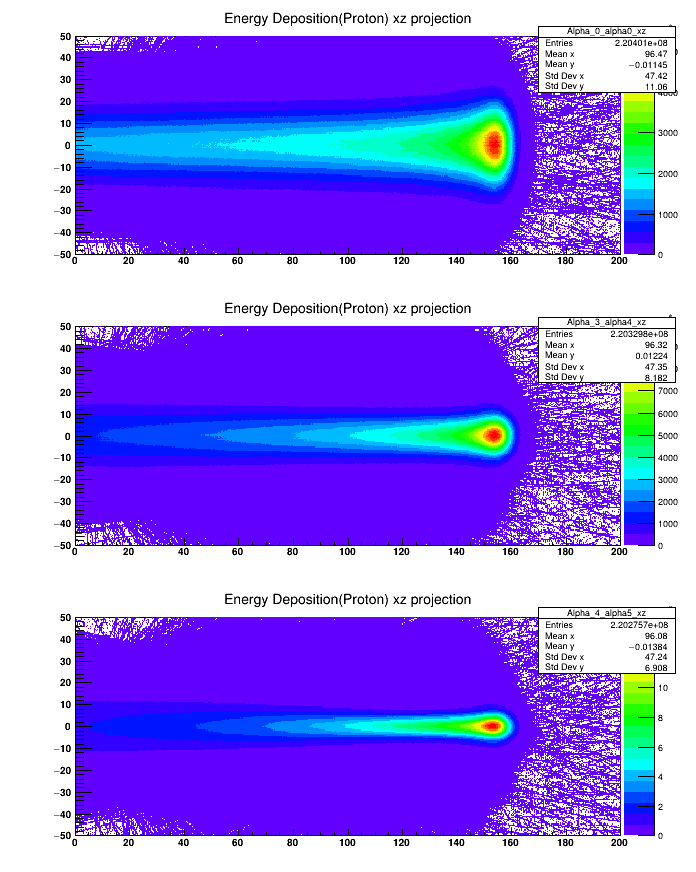

In [41]:
h1 = TH2D()
h2 = TH2D()
h3 = TH2D()
hs = THStack("hs","");

DataFile1  = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[0])
hp = DataFile1.Get('ProtonEnergyHisto').Clone("Alpha_0")
hp.SetDirectory(0)
print(hp)
h1= hp.Project3D("Alpha0_xz")
print(h1)
hs.Add(h1);

DataFile2  = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[1])
hh = DataFile2.Get('ProtonEnergyHisto').Clone("Alpha_3")
hh.SetDirectory(0)
print(hh)
h2= hh.Project3D("Alpha4_xz")
print(h2)
hs.Add(h2);

DataFile3  = ROOT.TFile(DataFileLocation+"/"+DataFile10mm[3])
hq = DataFile3.Get('ProtonEnergyHisto').Clone("Alpha_4")
hq.SetDirectory(0)
print(hq)
h3= hq.Project3D("Alpha5_xz")
print(h3)
hs.Add(h3);
cs = TCanvas("cs","cs",10,10,700,900);
cs.Divide(1,3);
cs.cd(1); h1.Draw("COLZ");
cs.cd(2); h2.Draw("COLZ"); 
cs.cd(3); h3.Draw("COLZ"); 
cs.Draw()


In [36]:
correctedEnergyHisto = TH2D(Energy_XZ)

for i in range(1,801):
    for j in range(1,401):
        actual_energy = Energy_XZ.GetBinContent(i, j)
        modified_energy = actual_energy*REB[i-1]
        correctedEnergyHisto.SetBinContent(i, j, modified_energy)
        

Info in <TCanvas::Print>: png file RBE_Dose_200mm.png has been created


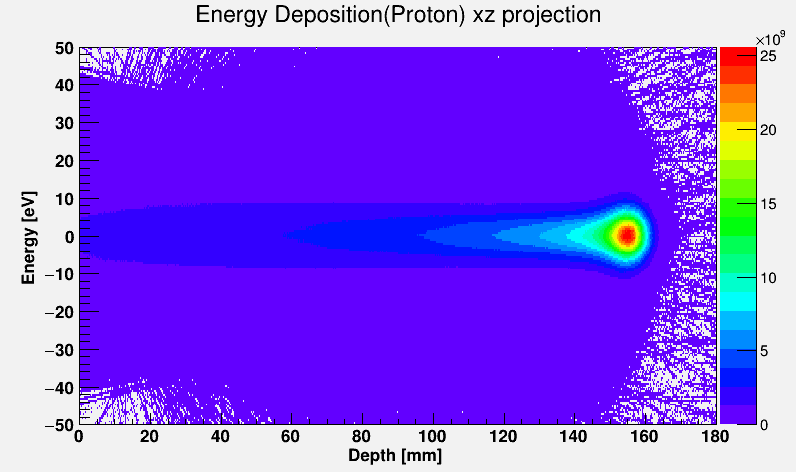

In [37]:
can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)
hist = correctedEnergyHisto
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.Draw("COLZ")
gStyle.SetPalette(1)
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()
can1.Print("RBE_Dose_200mm.png");

In [73]:
DataFile05    = ROOT.TFile("/home/fardousr/Project/DataFile/Step05R05mm.root")
Energy_Z05    = DataFile05.Get('ProtonEnergyHisto').ProjectionZ()
LET_Data_Z05  = DataFile05.Get('ProtonLETdataHisto').ProjectionZ()
NumProton05   = DataFile05.Get('ParticelCounter').GetBinContent(1)
Energy_XZ05   = DataFile05.Get('ProtonEnergyHisto').Project3D("xz")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


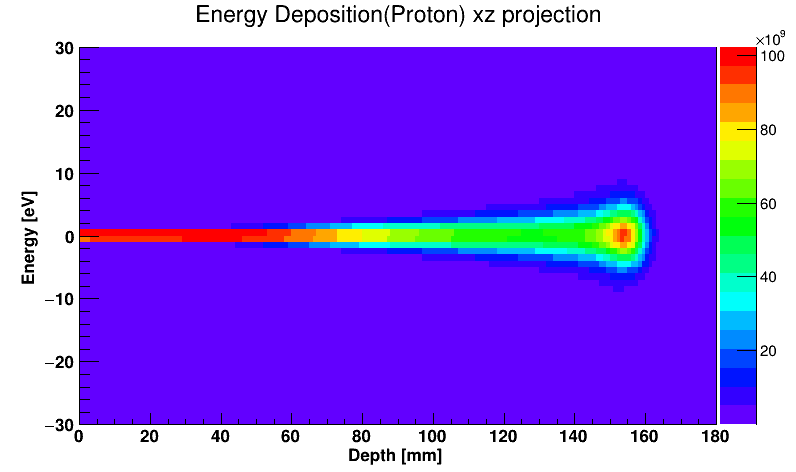

In [86]:

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)
c1.Clear();
hist = Energy_XZ05
can1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-30, 30);
hist.Draw("COLZ")
hist.SetStats(0)
c1.Modified()
c1.Update()
c1.Draw()

In [63]:
DataFileList = []
DataFileList.append(ROOT.TFile("/home/fardousr/Project/DataFile/Step05R10mm.root"))
DataFileList.append(ROOT.TFile("/home/fardousr/Project/DataFile/Step05R30mm.root"))

Energy_Z_list     = []
LET_Data_Z_list   = []
NumProton_list    = []
Energy_XZ_list    = []

for i in range(2):
    Energy_Z_list.append(DataFileList[i].Get('ProtonEnergyHisto').ProjectionZ())
    LET_Data_Z_list.append(DataFileList[i].Get('ProtonLETdataHisto').ProjectionZ())
    NumProton_list.append(DataFileList[i].Get('ParticelCounter').GetBinContent(1))
    Energy_XZ_list.append(DataFileList[i].Get('ProtonEnergyHisto').Project3D("xz"))


print(NumProton_list)

[299637.0, 2439626.0]


In [64]:
print(Energy_XZ_list)

[<cppyy.gbl.TH2D object at 0x560849a6ff40>, <cppyy.gbl.TH2D object at 0x560849a6ff40>]


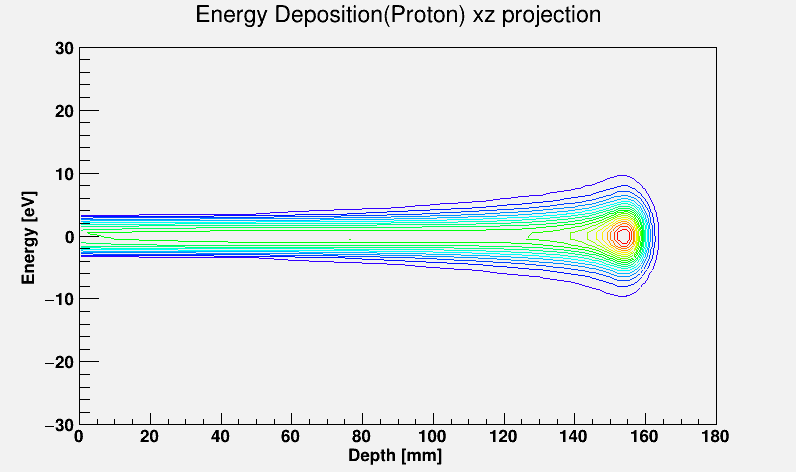

In [67]:
can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)
hist = Energy_XZ_list[0]
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-30, 30);
hist.Draw("CONT1")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

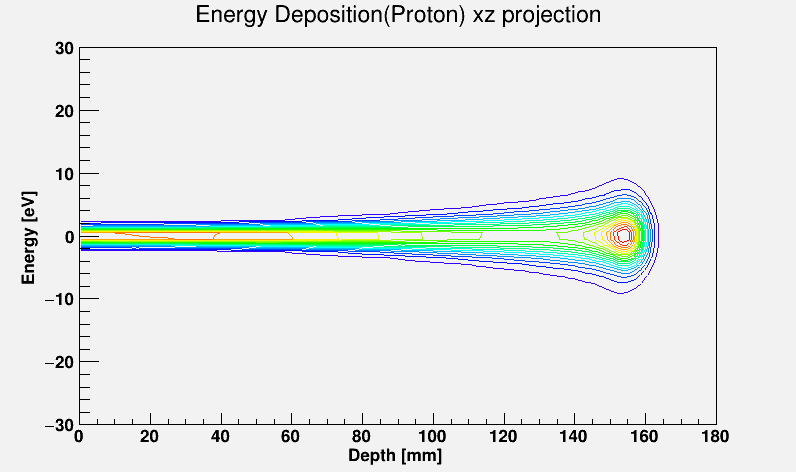

In [45]:
can1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)
hist = Energy_XZ
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-30, 30);
hist.Draw("CONT1")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


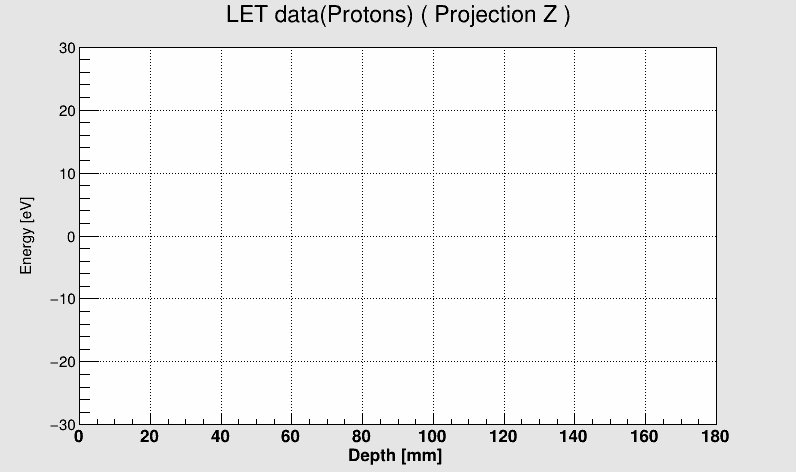

In [64]:
c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)


LET_Data_Z.Draw("HIST C")
c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

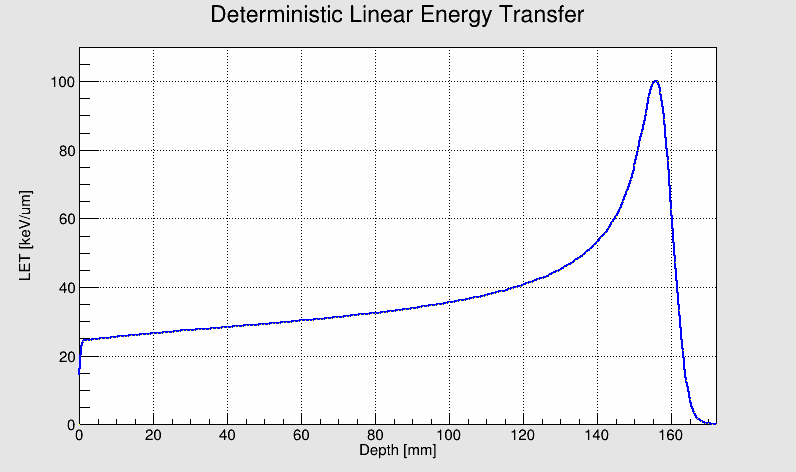

In [6]:
Energy  = array( 'd' )
depth = array( 'd' )

max = TotalBinEnergy.GetMaximum()

for i in range(0,200):    
    d = TotalBinEnergy.GetBinContent(i)
    Energy.append((d/max)*100)
    depth.append(i+0)

dosegraph = TGraph(200, depth, Energy)
dosegraph.SetLineColor( 4 )
dosegraph.SetLineWidth( 2 )
dosegraph.SetMarkerColor( 5 )
dosegraph.GetXaxis().CenterTitle();
dosegraph.GetYaxis().CenterTitle();

dosegraph.SetMarkerStyle( 0 )
dosegraph.SetTitle( 'Deterministic Linear Energy Transfer' )
dosegraph.GetXaxis().SetTitle( 'Depth [mm]' )
dosegraph.GetXaxis().SetLimits(0, 172)
dosegraph.GetYaxis().SetTitle( 'LET [keV/um]' )
dosegraph.Draw( 'ACP' )

c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


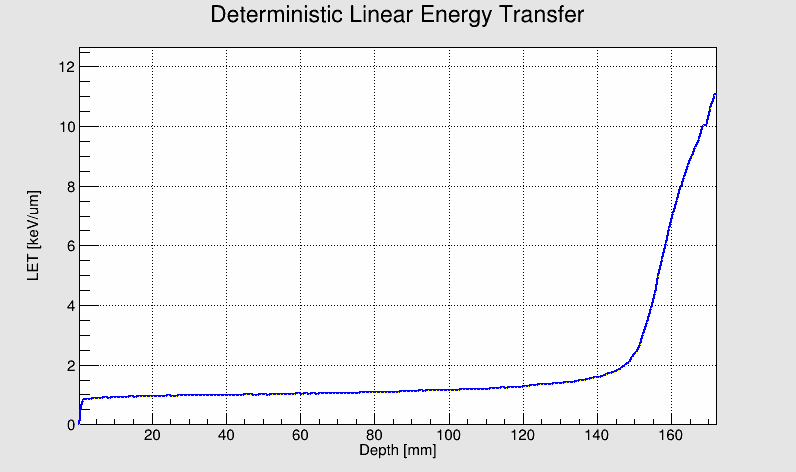

In [7]:
DoseAverageLETCom =  DoseAverageLETComHist/TotalBinEnergy

DeterministicDoseAveragedLET = array( 'd' )
Dose  = array( 'd' )
depth = array( 'd' )

max = TotalBinEnergy.GetMaximum()

for i in range(0,200):
    let = DoseAverageLETCom.GetBinContent(i)
    d = TotalBinEnergy[i]/max
    DeterministicDoseAveragedLET.append(let)
    Dose.append(d*100)
    depth.append(i+0.5)

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)

DetLETgraph = TGraph( 200, depth, DeterministicDoseAveragedLET)
DetLETgraph.SetLineColor( 4 )
DetLETgraph.SetLineWidth( 2 )
DetLETgraph.SetMarkerColor( 5 )
DetLETgraph.GetXaxis().CenterTitle();
DetLETgraph.GetYaxis().CenterTitle();

DetLETgraph.SetMarkerStyle( 0 )
DetLETgraph.SetTitle( 'Deterministic Linear Energy Transfer' )
DetLETgraph.GetXaxis().SetTitle( 'Depth [mm]' )
DetLETgraph.GetXaxis().SetLimits(0.5, 172)
DetLETgraph.GetYaxis().SetTitle( 'LET [keV/um]' )
DetLETgraph.Draw( 'ACP' )

c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


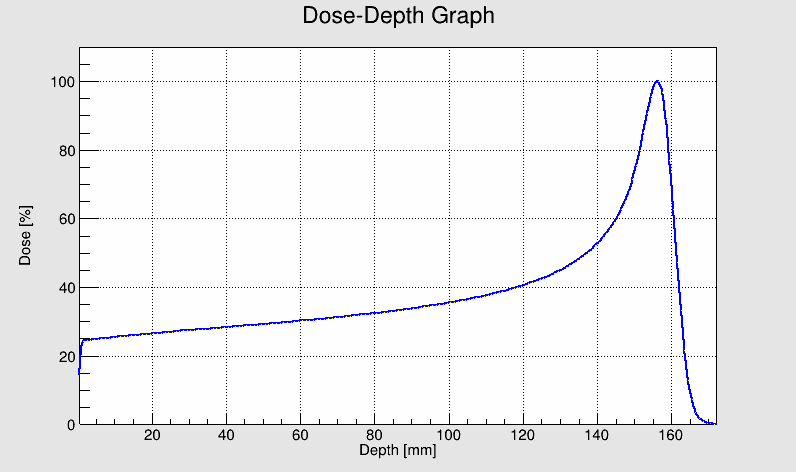

In [8]:
c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)

Dosegraph = TGraph( 200, depth, Dose)
Dosegraph.SetLineColor( 4 )
Dosegraph.SetLineWidth( 2 )
Dosegraph.SetMarkerColor( 5 )
Dosegraph.GetXaxis().CenterTitle();
Dosegraph.GetYaxis().CenterTitle();

Dosegraph.SetMarkerStyle( 0 )
Dosegraph.SetTitle( 'Dose-Depth Graph' )
Dosegraph.GetXaxis().SetTitle( 'Depth [mm]' )
Dosegraph.GetXaxis().SetLimits(0.5, 172)
Dosegraph.GetYaxis().SetTitle( 'Dose [%]' )
Dosegraph.Draw( 'ACP' )

c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


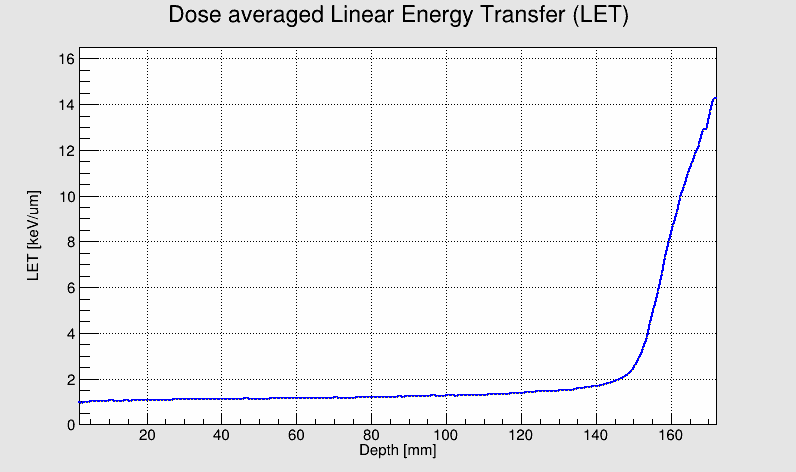

In [9]:
DoseAverageLETCal =  DoseAverageLETCalHist/TotalBinEnergy

DoseAveragedLET = array( 'd' )
depth = array( 'd' )

max = DoseAverageLETCal.GetMaximum()

for i in range(0,200):
    let = DoseAverageLETCal.GetBinContent(i)
    DoseAveragedLET.append(let*10**-6)
    depth.append(i+0.5)

c1 = TCanvas( 'c1', 'Dose averaged LET', 200, 10, 800, 500 )
gr = TGraph( 200, depth, DoseAveragedLET)
gr.SetLineColor( 4 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 5 )
gr.GetXaxis().CenterTitle();
gr.GetYaxis().CenterTitle();

gr.SetMarkerStyle( 0 )
gr.SetTitle( 'Dose averaged Linear Energy Transfer (LET)' )
gr.GetXaxis().SetTitle( 'Depth [mm]' )
gr.GetXaxis().SetLimits(2, 172)
gr.GetYaxis().SetTitle( 'LET [keV/um]' )
gr.Draw( 'ACP' )


c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

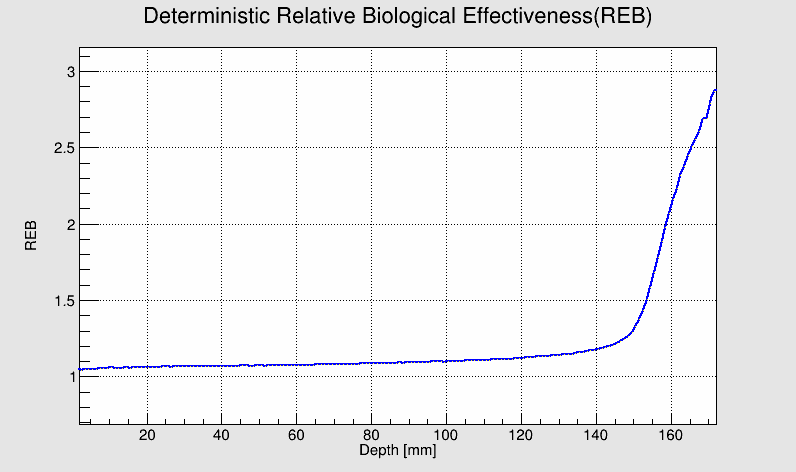

In [10]:
DeterministicREB   = array( 'd' )
depth = array( 'd' )

for i in range(0,200):
    let = DeterministicDoseAveragedLET[i]
    reb = 0.892 + (0.179*let)
    DeterministicREB.append(reb)
    depth.append(i+0.5)


gr = TGraph( 200, depth, DeterministicREB)
gr.SetLineColor( 4 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 5 )
gr.GetXaxis().CenterTitle();
gr.GetYaxis().CenterTitle();

gr.SetMarkerStyle( 0 )
gr.SetTitle( 'Deterministic Relative Biological Effectiveness(REB)' )
gr.GetXaxis().SetTitle( 'Depth [mm]' )
gr.GetXaxis().SetLimits(2, 172)
gr.GetYaxis().SetTitle( 'REB' )
gr.Draw( 'ACP' )

# TCanvas.Update() draws the frame, after which one can change it
c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )

c1.Modified()
c1.Update()
c1.Draw()


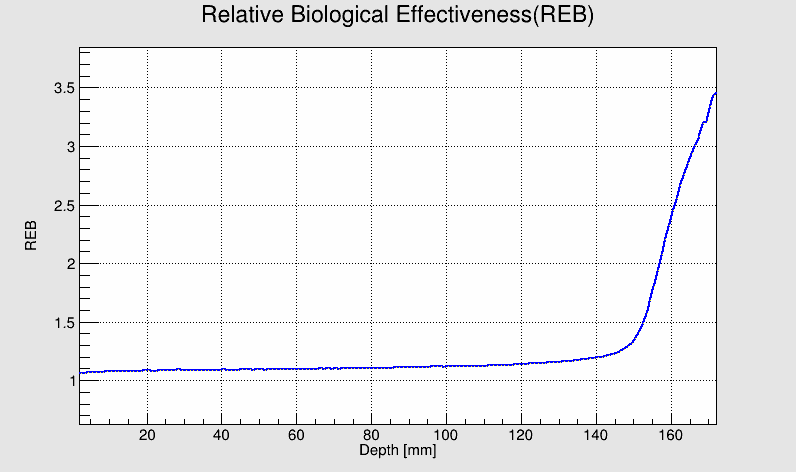

In [11]:
REB   = array( 'd' )
depth = array( 'd' )

for i in range(0,200):
    let = DoseAveragedLET[i]
    reb = 0.892 + (0.179*let)
    REB.append(reb)
    depth.append(i+0.5)
n = len(depth)
m = len(REB)


gr = TGraph( 200, depth, REB)
gr.SetLineColor( 4 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 5 )
gr.GetXaxis().CenterTitle();
gr.GetYaxis().CenterTitle();

gr.SetMarkerStyle( 0 )
gr.SetTitle( 'Relative Biological Effectiveness(REB)' )
gr.GetXaxis().SetTitle( 'Depth [mm]' )
gr.GetXaxis().SetLimits(2, 172)
gr.GetYaxis().SetTitle( 'REB' )
gr.Draw( 'ACP' )

# TCanvas.Update() draws the frame, after which one can change it
c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )

c1.Modified()
c1.Update()
c1.Draw()


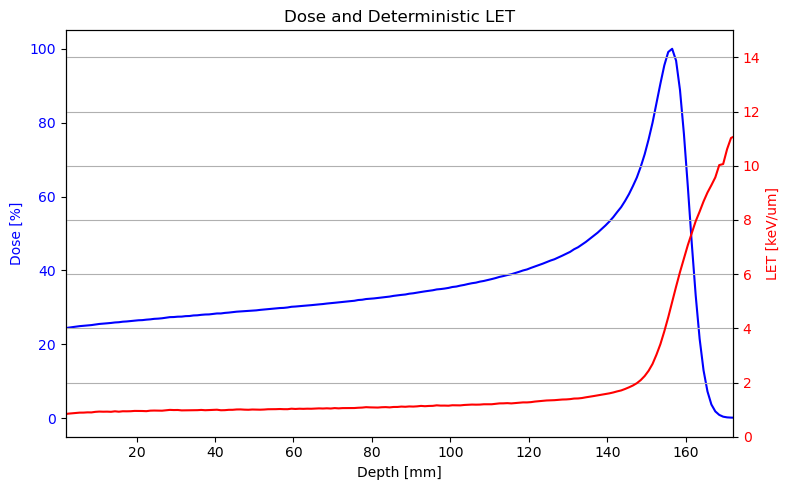

In [12]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose, color='blue')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DeterministicDoseAveragedLET, color='red')
ax2.grid(True, 'both')
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Deterministic LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

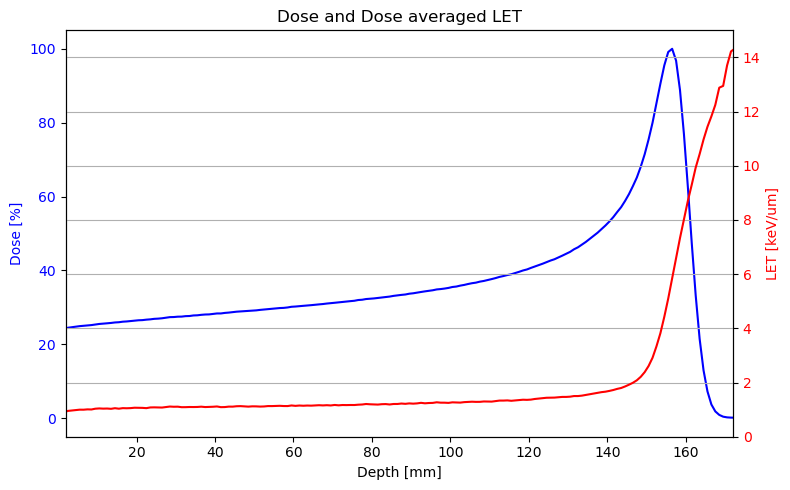

In [13]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose, color='blue')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DoseAveragedLET, color='red')
ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Dose averaged LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

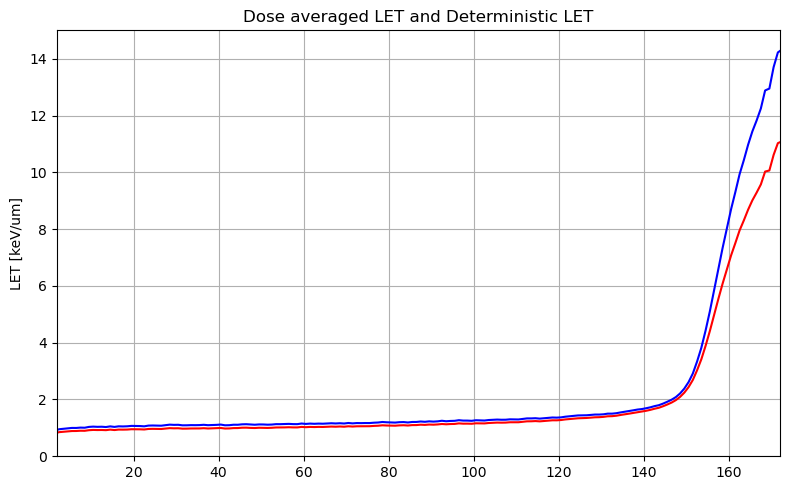

In [14]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.plot(depth, DoseAveragedLET, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
 
ax1.set_ylabel('LET [keV/um]', color='black') 
ax1.plot(depth, DeterministicDoseAveragedLET, color='red')
ax1.grid(True)
plt.ylim(0,15)
plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='black')

plt.title('Dose averaged LET and Deterministic LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

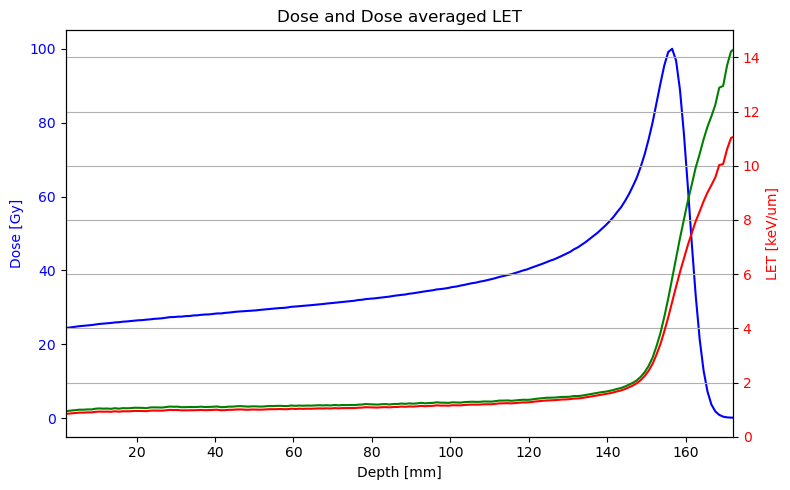

In [15]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [Gy]', color='blue')
ax1.plot(depth, Dose, color='blue')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DoseAveragedLET, color='green')
ax2.plot(depth, DeterministicDoseAveragedLET, color='red')
ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Dose averaged LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

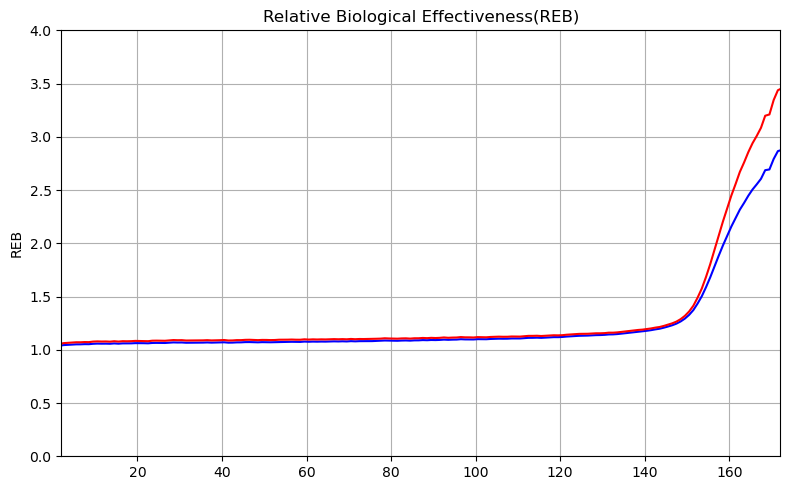

In [16]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.plot(depth, DeterministicREB, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
 
ax1.set_ylabel('REB', color='black') 
ax1.plot(depth, REB, color='red')
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black')

plt.ylim(0,4)
plt.xlim(2,172)

plt.title('Relative Biological Effectiveness(REB)')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

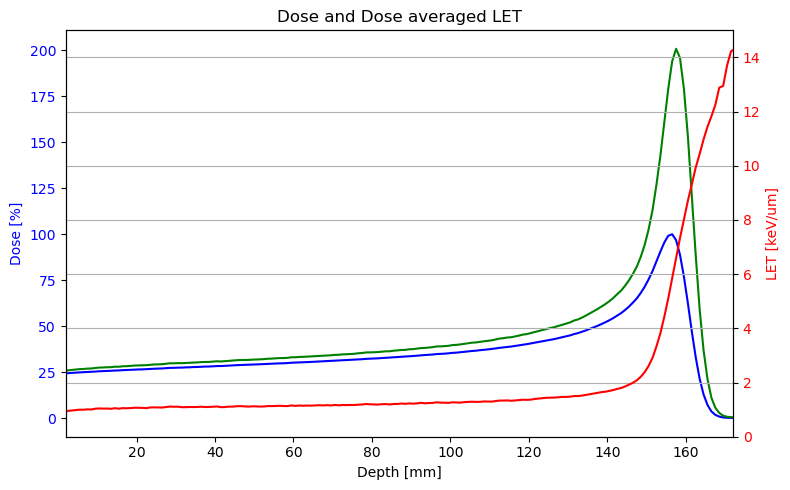

In [17]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

REBweightedDose = np.array(Dose)*np.array(REB)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose, color='blue')
ax1.plot(depth, REBweightedDose, color='green')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DoseAveragedLET, color='red')
ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Dose averaged LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

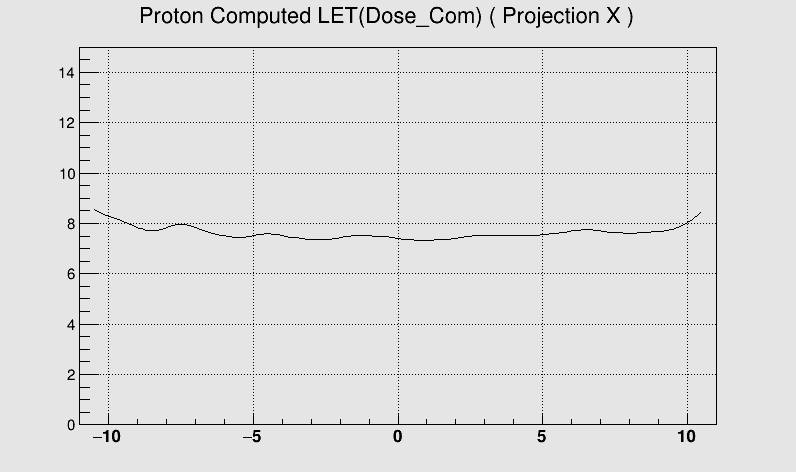

In [19]:

DoseLETCom3DHist = TH3D()
ymax = 200
ymin =-200
zmax = 160
zmin = 163

DoseLETComXPro   = DataFile_00.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)

EnergyDepoXPro   = DataFile_00.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)


LETComXPro = DoseLETComXPro/EnergyDepoXPro
LETComXPro.Draw("HIST C")
LETComXPro.GetXaxis().CenterTitle();
LETComXPro.GetYaxis().CenterTitle();
LETComXPro.GetXaxis().SetRangeUser(-11, 11);
LETComXPro.GetYaxis().SetRangeUser(0, 15);
LETComXPro.SetStats(0)
c1.Modified()
c1.Update()
c1.Draw()

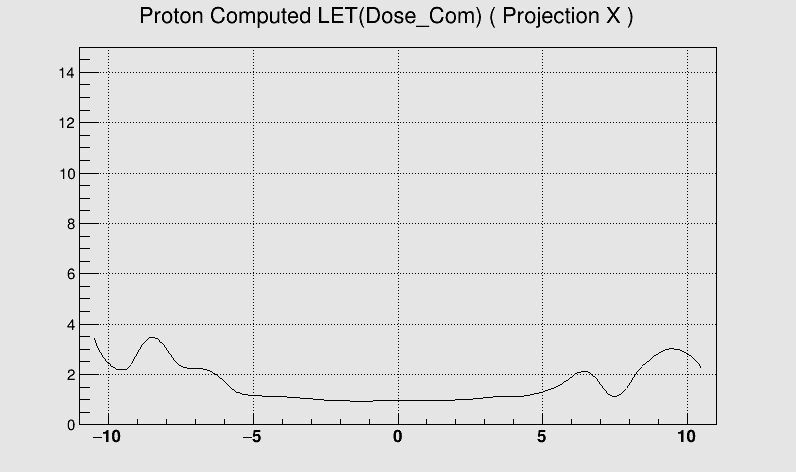

In [20]:

DoseLETCom3DHist = TH3D()
ymax = 200
ymin =-200
zmax = 100
zmin = 102

DoseLETComXPro   = DataFile_00.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)

EnergyDepoXPro   = DataFile_00.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)


LETComXPro = (DoseLETComXPro*10**-6)/EnergyDepoXPro
LETComXPro.Draw("HIST C")
LETComXPro.GetXaxis().CenterTitle();
LETComXPro.GetYaxis().CenterTitle();
LETComXPro.GetXaxis().SetRangeUser(-11, 11);
LETComXPro.GetYaxis().SetRangeUser(0, 15);
LETComXPro.SetStats(0)
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


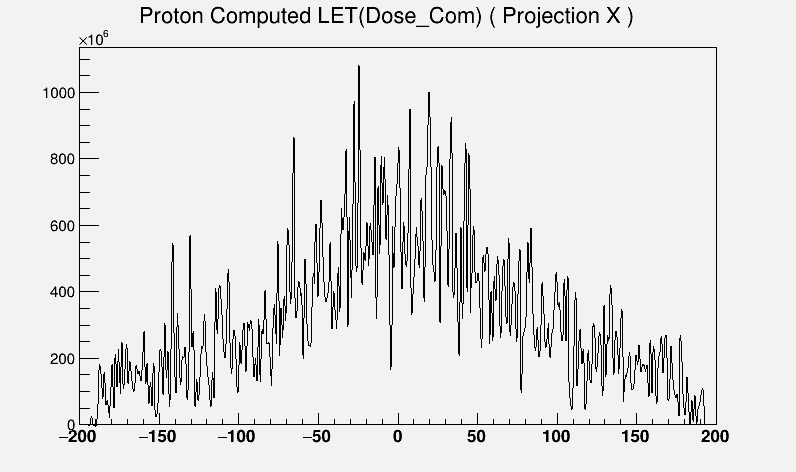

In [47]:
hist = DataFile_02.Get('Proton3DDoseLETCom')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
h = hist.ProjectionX('ProX', 100, 150)
h.Draw("HIST C")
h.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


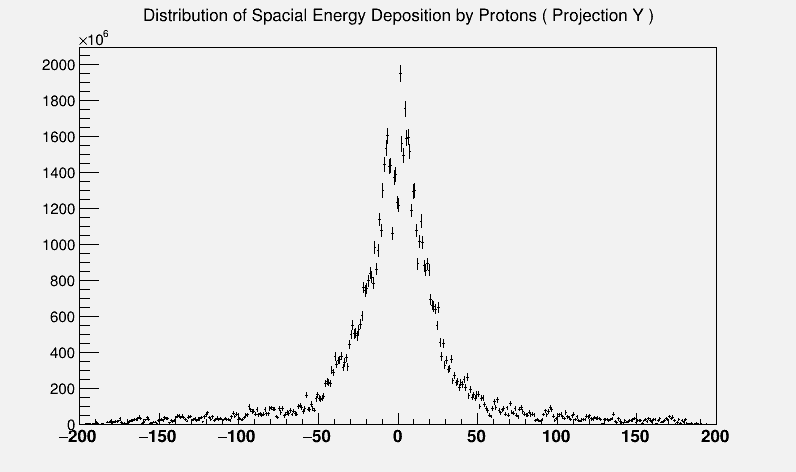

In [33]:
hist = DataFile_00.Get('ProtonSpacialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
h1 = hist.ProjectionY("x", 0, 180)
h1.Draw("COLZ")
h1.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllTrans(X)EnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-25, 25);
hist.Draw("HIST C")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTrans(X)EnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-25, 25);
hist.Draw("HIST C")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllTransverseEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-50, 50);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.Draw("COLZ")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTransverseEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-50, 50);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.Draw("COLZ")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllRadialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetYaxis().SetRangeUser(0, 30);
hist.Draw("CONT")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonRadialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetYaxis().SetRangeUser(0, 30);
hist.Draw("CONT")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllTransXLongEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.Draw("CONT")
hist.GetYaxis().SetRangeUser(-20, 20);
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTransXLongEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetYaxis().SetRangeUser(-20, 20);
hist.Draw("CONT")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTransXLongEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )

hist.Draw()
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonSpacialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("X [mm]");
hist.GetYaxis().SetTitle("Y [eV]");
hist.GetZaxis().SetTitle("Z [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetZaxis().CenterTitle();
hist.Draw("COLZ")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonSpacialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
h1 = hist.ProjectionY("x", 100, 101)
h1.Draw("COLZ")
h1.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist1 = DataFile.Get('ProtonLongDoseLETCom')
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist1.GetXaxis().SetTitle("Depth [mm]");
hist1.GetYaxis().SetTitle("Transverse [mm]");
hist1.Draw()
hist1.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()

In [ ]:
hist2 = DataFile.Get('ProtonLongEnergyDepoHist')
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist2.GetXaxis().SetTitle("Depth [mm]");
hist2.GetYaxis().SetTitle("Transverse [mm]");
hist2.Draw()
hist2.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()

In [ ]:
hist = hist1/hist2

c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse [mm]");
hist.Draw()
hist.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()

In [ ]:
hist3 = DataFile.Get('ProtonLongDoseLETCal')
c = TCanvas( 'c', 'Dynamic Filling Example', 200, 10, 700, 500 )
c.SetFillColor( 19 )
c.GetFrame().SetFillColor( 21 )
c.GetFrame().SetBorderSize( 6 )
c.GetFrame().SetBorderMode( -1 )
hist3.GetXaxis().SetTitle("Depth [mm]");
hist3.GetYaxis().SetTitle("Transverse [mm]");
hist3.Draw()
hist3.Draw("HIST SAME C")
c.Modified()
c.Update()
c.Draw()

In [ ]:
hist = hist3/hist2

c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse [mm]");
hist.Draw()
hist.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()

In [ ]:
Energy_Z=(Data.Get('ProtonEnergyHisto').ProjectionZ())
LET_Data_Z=(Data.Get('ProtonLETdataHisto').ProjectionZ())
NumProton=(Data.Get('ParticelCounter').GetBinContent(1))
Energy_XZ=(Data.Get('ProtonEnergyHisto').Project3D("xz"))


hist = Energy_XZ
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(0, 180);
hist.GetYaxis().SetRangeUser(-30, 30);
hist.Draw("COLZ")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
Energy_Z    = []
LET_Data_Z  = []
NumProton   = []
Energy_XZ   = []

for i in range(0,6):
    energy_z = DataFile[i].Get('ProtonEnergyHisto').ProjectionZ()
    Energy_Z.append(energy_z)
    let_data_z = DataFile[i].Get('ProtonLETdataHisto').ProjectionZ()
    LET_Data_Z.append(let_data_z)
    numproton = DataFile[i].Get('ParticelCounter').GetBinContent(1)
    NumProton.append(numproton)
    energy_xz = DataFile[i].Get('ProtonEnergyHisto').Project3D("xz")
    Energy_XZ.append(energy_xz)
    del energy_z
    del let_data_z
    del numproton
    del energy_xz

In [ ]:
DataFile05    = ROOT.TFile("/home/fardousr/Project/DataFile/Step05R05mm.root")
Energy_Z05    = DataFile05.Get('ProtonEnergyHisto').ProjectionZ()
LET_Data_Z05  = DataFile05.Get('ProtonLETdataHisto').ProjectionZ()
NumProton05   = DataFile05.Get('ParticelCounter').GetBinContent(1)
Energy_XZ05   = DataFile05.Get('ProtonEnergyHisto').Project3D("xz")

DataFile10    = ROOT.TFile("/home/fardousr/Project/DataFile/Step05R10mm.root")
Energy_Z10    = DataFile10.Get('ProtonEnergyHisto').ProjectionZ()
LET_Data_Z10  = DataFile10.Get('ProtonLETdataHisto').ProjectionZ()
NumProton10   = DataFile10.Get('ParticelCounter').GetBinContent(1)
Energy_XZ10   = DataFile10.Get('ProtonEnergyHisto').Project3D("xz")

DataFile15    = ROOT.TFile("/home/fardousr/Project/DataFile/Step05R15mm.root")
Energy_Z15    = DataFile15.Get('ProtonEnergyHisto').ProjectionZ()
LET_Data_Z15  = DataFile15.Get('ProtonLETdataHisto').ProjectionZ()
NumProton15   = DataFile15.Get('ParticelCounter').GetBinContent(1)
Energy_XZ15   = DataFile15.Get('ProtonEnergyHisto').Project3D("xz")

DataFile20    = ROOT.TFile("/home/fardousr/Project/DataFile/Step05R20mm.root")
Energy_Z20    = DataFile20.Get('ProtonEnergyHisto').ProjectionZ()
LET_Data_Z20  = DataFile20.Get('ProtonLETdataHisto').ProjectionZ()
NumProton20   = DataFile20.Get('ParticelCounter').GetBinContent(1)
Energy_XZ20   = DataFile20.Get('ProtonEnergyHisto').Project3D("xz")

DataFile25    = ROOT.TFile("/home/fardousr/Project/DataFile/Step05R25mm.root")
Energy_Z25    = DataFile25.Get('ProtonEnergyHisto').ProjectionZ()
LET_Data_Z25  = DataFile25.Get('ProtonLETdataHisto').ProjectionZ()
NumProton25   = DataFile25.Get('ParticelCounter').GetBinContent(1)
Energy_XZ25   = DataFile25.Get('ProtonEnergyHisto').Project3D("xz")


DataFile30    = ROOT.TFile("/home/fardousr/Project/DataFile/Step05R30mm.root")
Energy_Z30    = DataFile30.Get('ProtonEnergyHisto').ProjectionZ()
LET_Data_Z30  = DataFile30.Get('ProtonLETdataHisto').ProjectionZ()
NumProton30   = DataFile30.Get('ParticelCounter').GetBinContent(1)
Energy_XZ30   = DataFile30.Get('ProtonEnergyHisto').Project3D("xz")